# **üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Baseline code**
> Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ     
> ÏïÑÎûò baselineÏóêÏÑúÎäî RandomForestÎ•º ÌôúÏö©Ìï¥ ML Î∞©Î≤ïÎ°†Îì§ÏùÑ Ïã§Ï†ú ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
> Í∞ïÏùòÎäî google colabÏúºÎ°ú Ïã§ÌñâÌïòÏòÄÍ∏∞Ïóê ÏïÑÎûòÏùò Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÏôÄÎäî ÏùºÎ∂Ä Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1 . Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [1]:
!pip install eli5==0.13.0

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

### Ï∂îÍ∞Ä
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 216.2/216.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=4c61328d3dab8dc75ca32acc970cfacd8551f6369a893ab8a467e573afd872e5
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,529 kB/s)
Selecting previously unselected package fonts-nanum.
(Readi

In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')

### Ï∂îÍ∞Ä
#plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
### Ï∂úÏ≤ò: https://giveme-happyending.tistory.com/192 [ÏÜåÏó∞Ïùò_Í∞úÎ∞úÏùºÏßÄ:Ìã∞Ïä§ÌÜ†Î¶¨]

import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 500)

import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


## 2 . Data Load

### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
print(os.getcwd())

/content


In [6]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = '/content/drive/MyDrive/AILAB_Advance/train.csv'
test_path  = '/content/drive/MyDrive/AILAB_Advance/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

### 2.2 Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïö©ÌôïÏù∏

#### 2.2.1 dt Ïùò Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïö© ÌôïÏù∏

In [7]:
dt.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏  \
0  Ïñ∏Ï£ºÎ°ú 3      NaN           -      -                ÏïÑÌååÌä∏  025776611  025776673   

   Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  \
0         NaN           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©     8.0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§   

  k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
0    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   20204.0    22637.0   

   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º k-ÌôàÌéòÏù¥ÏßÄ  \
0                20.0                   250.0           0.0       NaN    NaN   

                  k-Îì±Î°ùÏùºÏûê                 k-ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  \
0  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ   

  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y   

  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1118822 non-null  object 
 1   Î≤àÏßÄ                      1118597 non-null  object 
 2   Î≥∏Î≤à                      1118747 non-null  float64
 3   Î∂ÄÎ≤à                      1118747 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1116696 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 1118822 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1118822 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1118822 non-null  int64  
 8   Ï∏µ                       1118822 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1118822 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1118822 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 5983 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê              

In [9]:
dt.describe()

Î≥∏Î≤à            Î∂ÄÎ≤à       Ï†ÑÏö©Î©¥Ï†Å(„é°)          Í≥ÑÏïΩÎÖÑÏõî           Í≥ÑÏïΩÏùº  \
count  1.118747e+06  1.118747e+06  1.118822e+06  1.118822e+06  1.118822e+06   
mean   5.649108e+02  5.978885e+00  7.717475e+01  2.014760e+05  1.580656e+01   
std    5.160642e+02  4.668584e+01  2.936423e+01  4.187868e+02  8.721166e+00   
min    0.000000e+00  0.000000e+00  1.002000e+01  2.007010e+05  1.000000e+00   
25%    1.760000e+02  0.000000e+00  5.965000e+01  2.011100e+05  8.000000e+00   
50%    4.700000e+02  0.000000e+00  8.188000e+01  2.015070e+05  1.600000e+01   
75%    7.810000e+02  1.000000e+00  8.496000e+01  2.018040e+05  2.300000e+01   
max    4.974000e+03  2.837000e+03  4.243200e+02  2.023060e+05  3.100000e+01   

                  Ï∏µ          Í±¥Ï∂ïÎÖÑÎèÑ       Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº    Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob         k-Ï†ÑÏ≤¥ÎèôÏàò  \
count  1.118822e+06  1.118822e+06  5.983000e+03  68582.000000  248192.000000   
mean   8.871968e+00  1.998755e+03  2.021057e+07    541.529979      14.798346   
std    5.982584e+00  9.333908e+00  1.060697e+04    751.809853      17.693533   
min   -4.000000e+00  1.961000e+03  2.020022e+07      1.000000       1.000000   
25%    4.000000e+00  1.992000e+03  2.020082e+07      4.000000       5.000000   
50%    8.000000e+00  2.000000e+03  2.021030e+07    174.000000      10.000000   
75%    1.200000e+01  2.005000e+03  2.022021e+07    725.000000      17.000000   
max    6.900000e+01  2.023000e+03  2.023093e+07   2888.000000     124.000000   

             k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò         k-Ïó∞Î©¥Ï†Å       k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å      k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
count  249259.000000  2.492590e+05  249214.000000  249259.000000   
mean     1184.124593  1.614967e+05   94210.104998  120726.487549   
std      1191.474680  1.839856e+05  101905.956897  129020.276480   
min        59.000000  0.000000e+00    2338.000000       0.000000   
25%       403.000000  5.366600e+04   31934.000000   40735.000000   
50%       768.000000  1.016330e+05   60280.000000   78125.000000   
75%      1622.000000  2.039040e+05  117086.000000  159544.000000   
max      9510.000000  9.591851e+06  734781.000000  969877.000000   

       k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)   k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º  \
count       249214.000000           249214.000000  249214.000000     327.0   
mean           477.912838              476.713439     167.528470      70.0   
std            759.909400              727.553569     248.928143       0.0   
min              0.000000                0.000000       0.000000      70.0   
25%             48.000000               95.000000       0.000000      70.0   
50%            225.000000              256.000000      63.000000      70.0   
75%            576.000000              582.000000     237.000000      70.0   
max           4975.000000             5132.000000    1500.000000      70.0   

               Í±¥Ï∂ïÎ©¥Ï†Å           Ï£ºÏ∞®ÎåÄÏàò            Ï¢åÌëúX            Ï¢åÌëúY        target  
count  2.491080e+05  249108.000000  249152.000000  249152.000000  1.118822e+06  
mean   1.895070e+05    1063.678778     126.995228      37.545785  5.799153e+04  
std    1.729027e+06    1235.437604       0.091045       0.052483  4.642602e+04  
min    0.000000e+00       0.000000     126.798318      37.447843  3.500000e+02  
25%    0.000000e+00     315.000000     126.913157      37.499201  3.050000e+04  
50%    1.710550e+03     683.000000     127.014971      37.544936  4.480000e+04  
75%    8.414210e+03    1274.000000     127.059590      37.577117  6.980000e+04  
max    3.159620e+07   12096.000000     127.179998      37.687725  1.450000e+06

In [10]:
dt.ÏãúÍµ∞Íµ¨.value_counts()

ÏãúÍµ∞Íµ¨
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ ÏÉÅÍ≥ÑÎèô    44948
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ Ï§ëÍ≥ÑÎèô    26357
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨ Ïã†Ï†ïÎèô    23569
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ Ï∞ΩÎèô     23101
ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô    22811
                 ...  
ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÍµ¨ ÌïÑÎèô1Í∞Ä        6
ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ Ï£ºÏÑ±Îèô        5
ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Ïó∞ÏßÄÎèô        4
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ Íµ¨ÏàòÎèô        3
ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÍµ¨ ÏûÖÏ†ïÎèô         1
Name: count, Length: 339, dtype: int64

In [11]:
dt.ÏïÑÌååÌä∏Î™Ö.value_counts()

ÏïÑÌååÌä∏Î™Ö
ÌòÑÎåÄ              16644
Ïã†ÎèôÏïÑ             12846
ÌïúÏã†               9074
ÎëêÏÇ∞               8533
Ï£ºÍ≥µ2              7918
                ...  
ÏÜ°ÌååÎ†àÏù¥ÌÅ¨ÌååÌÅ¨Ìò∏Î∞òÏç®Î∞ã‚Ö°        1
ÎèÑÍ≥°ÌïòÏù¥Îπå               1
Ï∞ΩÎèôÏó≠Î∏îÎ£®ÌïÄ1Îèô            1
ÌïúÍ∞ïÎ¶¨Î≤ÑÌûêBÎèô             1
Ïã†Ïö©ÏÇ∞ÎπåÎî©               1
Name: count, Length: 6538, dtype: int64

In [12]:
dt['k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)'].value_counts()

k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)
ÏïÑÌååÌä∏               235994
Ï£ºÏÉÅÎ≥µÌï©               11360
ÎèÑÏãúÌòï ÏÉùÌôúÏ£ºÌÉù(Ï£ºÏÉÅÎ≥µÌï©)       500
ÎèÑÏãúÌòï ÏÉùÌôúÏ£ºÌÉù(ÏïÑÌååÌä∏)        152
Ïó∞Î¶ΩÏ£ºÌÉù                 125
Name: count, dtype: int64

In [13]:
dt['k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)'].value_counts()

k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)
Î∂ÑÏñë    206371
Í∏∞ÌÉÄ     40686
ÏûÑÎåÄ      2202
Name: count, dtype: int64

In [14]:
# Train dataÏôÄ Test data shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('Train data shape : ', dt.shape, 'Test data shape : ', dt_test.shape)

Train data shape :  (1118822, 52) Test data shape :  (9272, 51)


In [15]:
# TrainÍ≥º Test dataÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
display(dt.head(1))
display(dt_test.head(1))      # Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä(=Target) columnÏù¥ Ï†úÏô∏Îêú Î™®ÏäµÏûÖÎãàÎã§.

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏  \
0  Ïñ∏Ï£ºÎ°ú 3      NaN           -      -                ÏïÑÌååÌä∏  025776611  025776673   

   Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  \
0         NaN           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©     8.0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§   

  k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
0    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   20204.0    22637.0   

   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º k-ÌôàÌéòÏù¥ÏßÄ  \
0                20.0                   250.0           0.0       NaN    NaN   

                  k-Îì±Î°ùÏùºÏûê                 k-ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  \
0  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ   

  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y   

  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  202307   26  5  1987   

     ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏  \
0  Ïñ∏Ï£ºÎ°ú 3      NaN         ÏßÅÍ±∞Îûò      -                ÏïÑÌååÌä∏  025776611  025776673   

   Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  \
0         NaN           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©     8.0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§   

  k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
0    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   20204.0    22637.0   

   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º k-ÌôàÌéòÏù¥ÏßÄ  \
0                20.0                   250.0           0.0       NaN    NaN   

                  k-Îì±Î°ùÏùºÏûê                 k-ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  \
0  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ   

  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y   

  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0

In [16]:
print(dt.columns)

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'ÎèÑÎ°úÎ™Ö', 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)',
       'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï',
       'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
       'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'k-ÌôàÌéòÏù¥ÏßÄ',
       'k-Îì±Î°ùÏùºÏûê', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏

In [17]:
display(dt.loc[0:3, 'ÏãúÍµ∞Íµ¨':'ÎèÑÎ°úÎ™Ö'])
display(dt.loc[0:3, 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº':'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'])
display(dt.loc[0:3, 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏':'Í±¥Ï∂ïÎ©¥Ï†Å'])
display(dt.loc[0:3, 'Ï£ºÏ∞®ÎåÄÏàò':'target'])

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712    8  3  1987   
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712   22  4  1987   
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    54.98  201712   28  5  1987   
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201801    3  4  1987   

     ÎèÑÎ°úÎ™Ö  
0  Ïñ∏Ï£ºÎ°ú 3  
1  Ïñ∏Ï£ºÎ°ú 3  
2  Ïñ∏Ï£ºÎ°ú 3  
3  Ïñ∏Ï£ºÎ°ú 3

Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ
0      NaN           -      -
1      NaN           -      -
2      NaN           -      -
3      NaN           -      -

Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å
0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0
1      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0
2      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0
3      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0

Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX  \
0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N  127.05721   
1  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N  127.05721   
2  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N  127.05721   
3  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N  127.05721   

         Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  
0  37.476763  2022-11-17 10:19:06.0  124000  
1  37.476763  2022-11-17 10:19:06.0  123500  
2  37.476763  2022-11-17 10:19:06.0   91500  
3  37.476763  2022-11-17 10:19:06.0  130000

In [18]:
display(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1118822 non-null  object 
 1   Î≤àÏßÄ                      1118597 non-null  object 
 2   Î≥∏Î≤à                      1118747 non-null  float64
 3   Î∂ÄÎ≤à                      1118747 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1116696 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 1118822 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1118822 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1118822 non-null  int64  
 8   Ï∏µ                       1118822 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1118822 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1118822 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 5983 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê              

None

#### 2.2.2 dt_ test Ïùò Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïö© ÌôïÏù∏

In [19]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ÏãúÍµ∞Íµ¨                     9272 non-null   object 
 1   Î≤àÏßÄ                      9270 non-null   object 
 2   Î≥∏Î≤à                      9272 non-null   float64
 3   Î∂ÄÎ≤à                      9272 non-null   float64
 4   ÏïÑÌååÌä∏Î™Ö                    9262 non-null   object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 9272 non-null   float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    9272 non-null   int64  
 7   Í≥ÑÏïΩÏùº                     9272 non-null   int64  
 8   Ï∏µ                       9272 non-null   int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    9272 non-null   int64  
 10  ÎèÑÎ°úÎ™Ö                     9272 non-null   object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 212 non-null    float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                  9272 non-null   object 
 13  Í

In [20]:
### target Ï∂îÍ∞ÄÏôÄ Í∞í ÏÖãÌåÖ
dt_test['target'] = 0

In [21]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
dt.isnull().sum()

ÏãúÍµ∞Íµ¨                             0
Î≤àÏßÄ                            225
Î≥∏Î≤à                             75
Î∂ÄÎ≤à                             75
ÏïÑÌååÌä∏Î™Ö                         2126
Ï†ÑÏö©Î©¥Ï†Å(„é°)                         0
Í≥ÑÏïΩÎÖÑÏõî                            0
Í≥ÑÏïΩÏùº                             0
Ï∏µ                               0
Í±¥Ï∂ïÎÖÑÎèÑ                            0
ÎèÑÎ°úÎ™Ö                             0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                   1112839
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                          0
Í±∞ÎûòÏú†Ìòï                            0
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                          0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)         870691
k-Ï†ÑÌôîÎ≤àÌò∏                     870274
k-Ìå©Ïä§Î≤àÌò∏                     872742
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                1050240
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)               869563
k-Í¥ÄÎ¶¨Î∞©Ïãù                     869563
k-Î≥µÎèÑÏú†Ìòï                     869890
k-ÎÇúÎ∞©Î∞©Ïãù                     869563
k-Ï†ÑÏ≤¥ÎèôÏ

## 3 . Data Preprocessing

- Î™®Îç∏ÎßÅ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì±ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î≤îÏ£ºÌòïÍ≥º Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!
- Î®ºÏ†Ä, Ïö©Ïù¥Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ trainÍ≥º test dataÎ•º Ìï©Ïπú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

<font color=Tomato> **concat ÌååÏùº ÎßåÎì§Í∏∞**

In [22]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [23]:
concat['is_test'].value_counts()      # trainÍ≥º test dataÍ∞Ä ÌïòÎÇòÎ°ú Ìï©Ï≥êÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

is_test
0    1118822
1       9272
Name: count, dtype: int64

In [24]:
### Ïù∏Îç±Ïä§Î•º Î¶¨ÏÖãÌïòÍ≥† Í∏∞Ï°¥ Ïù∏Îç±Ïä§Î•º ÏÉàÎ°úÏö¥ Ïó¥Î°ú Ï∂îÍ∞Ä
concat.reset_index(drop=True, inplace=True)
concat['recover_num'] = concat.index


In [25]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 54 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 6195 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê              

In [26]:
# ÏπºÎüº Ïù¥Î¶ÑÏùÑ ÏâΩÍ≤å Î∞îÍøîÏ£ºÍ≤†ÏäµÎãàÎã§. Îã§Î•∏ ÏπºÎüºÎèÑ ÏÇ¨Ïö©Ïóê Îî∞Îùº Î∞îÍøîÏ£ºÏÖîÎèÑ Îê©ÎãàÎã§!
concat = concat.rename(columns={'Ï†ÑÏö©Î©¥Ï†Å(„é°)':'Ï†ÑÏö©Î©¥Ï†Å'})

### 3.1. Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Î≥¥Í∞Ñ
- Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï† Îïå ÎßéÏù¥ Ïì∞Îäî Î∞©Î≤ïÏùÄ ÏÇ≠Ï†ú(Deletion)Í≥º ÎåÄÏ≤¥(Imputation) ÏûÖÎãàÎã§.
- Î≥∏ BaselineÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎäî Ï†úÍ±∞ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Í≤∞Ï∏°ÏπòÎäî ÎåÄÏ≤¥ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.
  - Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî 'NULL' Ïù¥ÎùºÎäî ÏûÑÏùòÏùò Î≤îÏ£ºÎ°ú ÎåÄÏ≤¥Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)Ïù¥ÎûÄ Îëê Ï†êÏùò Í∞íÏù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå **Í∑∏ ÏÇ¨Ïù¥Ïùò Í∞í**ÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏßÅÏÑ† Í±∞Î¶¨Ïóê Îî∞Îùº ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - ÏïÑÎûò ÎëêÍ∞úÏùò Î∂âÏùÄ Ï†ê ÏÇ¨Ïù¥Ïóê ($x$, $y$) Í∞íÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥, Ìï¥Îãπ Ï†êÏù¥ Îëê Î∂âÏùÄ Ï†êÏùÑ Ïù¥ÏùÄ ÏÑ†ÌòïÏ†ÅÏù∏ ÏÑ†Î∂ÑÏóê ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥†, Îã®Ïàú ÎπÑÎ°ÄÏãùÏúºÎ°ú ($x$, $y$)Î•º Ï∂îÏ†ïÌï¥ Î≥¥Í∞ÑÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - [Ï∞∏Í≥†ÏûêÎ£å](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%EB%B3%B4%EA%B0%84%EB%B2%95#:~:text=%EC%84%A0%ED%98%95%20%EB%B3%B4%EA%B0%84%EB%B2%95(%E7%B7%9A%E5%9E%8B%E8%A3%9C%E9%96%93%E6%B3%95,%EC%9C%BC%EB%A1%9C%20%EA%B3%84%EC%82%B0%ED%95%98%EB%8A%94%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.)


> 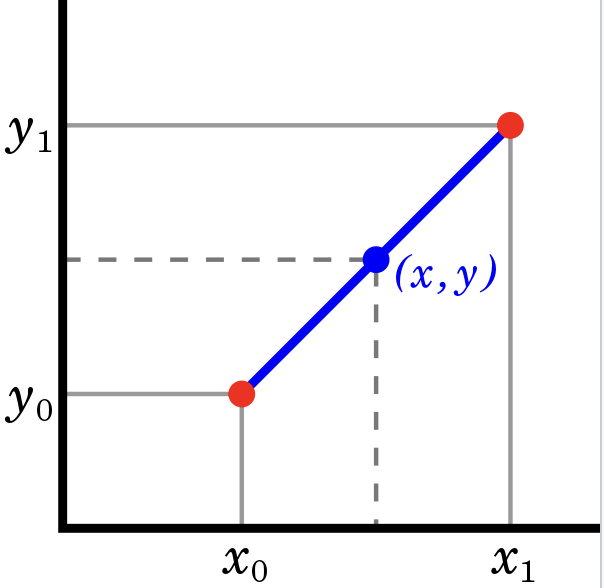

In [27]:
### Î™®Îì† ÏπºÎüºÏùò Îç∞Ïù¥ÌÑ∞Î•º Ïπ¥Ïö¥Ìä∏Î°ú Î≥¥Í∏∞
for i in range(len(concat.columns)):
    print(concat.columns[i], concat[concat.columns[i]].nunique())


ÏãúÍµ∞Íµ¨ 339
Î≤àÏßÄ 6578
Î≥∏Î≤à 1523
Î∂ÄÎ≤à 329
ÏïÑÌååÌä∏Î™Ö 6549
Ï†ÑÏö©Î©¥Ï†Å 14670
Í≥ÑÏïΩÎÖÑÏõî 201
Í≥ÑÏïΩÏùº 31
Ï∏µ 73
Í±¥Ï∂ïÎÖÑÎèÑ 60
ÎèÑÎ°úÎ™Ö 9245
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº 1033
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê 182
Í±∞ÎûòÏú†Ìòï 3
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ 739
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) 5
k-Ï†ÑÌôîÎ≤àÌò∏ 1082
k-Ìå©Ïä§Î≤àÌò∏ 1385
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob 94
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) 3
k-Í¥ÄÎ¶¨Î∞©Ïãù 3
k-Î≥µÎèÑÏú†Ìòï 5
k-ÎÇúÎ∞©Î∞©Ïãù 4
k-Ï†ÑÏ≤¥ÎèôÏàò 41
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò 522
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) 344
k-ÏãúÌñâÏÇ¨ 556
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº 674
k-Ïó∞Î©¥Ï†Å 735
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å 740
k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å 736
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò) 349
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò) 387
k-85„é°~135„é°Ïù¥Ìïò 244
k-135„é°Ï¥àÍ≥º 1
k-ÌôàÌéòÏù¥ÏßÄ 221
k-Îì±Î°ùÏùºÏûê 127
k-ÏàòÏ†ïÏùºÏûê 744
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ 526
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú 4
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï 2
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú 4
Í±¥Ï∂ïÎ©¥Ï†Å 455
Ï£ºÏ∞®ÎåÄÏàò 526
Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4 

In [28]:
# Ïã§Ï†úÎ°ú Í≤∞Ï∏°ÏπòÎùºÍ≥† ÌëúÏãúÎäî ÏïàÎêòÏñ¥ÏûàÏßÄÎßå ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÎì§Ïù¥ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.
# ÏïÑÎûò 3Í∞ÄÏßÄÏùò Í≤ΩÏö∞ Î™®Îëê ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
display(concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].value_counts())

Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê
            1111271
20230630        585
20230831        496
20230428        394
20230731        374
             ...   
20230105          3
20230125          3
20230109          1
20230102          1
20230104          1
Name: count, Length: 182, dtype: int64

In [29]:
display(concat['Í±∞ÎûòÏú†Ìòï'].value_counts())

Í±∞ÎûòÏú†Ìòï
-       1086451
Ï§ëÍ∞úÍ±∞Îûò      38123
ÏßÅÍ±∞Îûò        3520
Name: count, dtype: int64

In [30]:
display(concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].value_counts())

Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ
-                    1090013
ÏÑúÏö∏ ÎÖ∏ÏõêÍµ¨                  2627
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨                  2540
ÏÑúÏö∏ Í∞ïÎÇ®Íµ¨                  2508
ÏÑúÏö∏ Í∞ïÎèôÍµ¨                  2038
                      ...   
ÏÑúÏö∏ Í∞ïÎ∂ÅÍµ¨, ÏÑúÏö∏ ÏñëÏ≤úÍµ¨             1
Í≤ΩÍ∏∞ ÎÇ®ÏñëÏ£ºÏãú, Í≤ΩÍ∏∞ ÏÑ±ÎÇ®ÏàòÏ†ïÍµ¨          1
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨, Ïù∏Ï≤ú Í≥ÑÏñëÍµ¨             1
Í≤ΩÍ∏∞ Ïó∞Ï≤úÍµ∞, ÏÑúÏö∏ ÏÜ°ÌååÍµ¨             1
ÏÑúÏö∏ Ï§ëÎûëÍµ¨, Ïù∏Ï≤ú Î∂ÄÌèâÍµ¨             1
Name: count, Length: 739, dtype: int64

In [31]:
# ÏúÑ Ï≤òÎüº ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî ÏπºÎüºÏùÄ Í≤∞Ï∏°ÏπòÏôÄ Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÌïòÎØÄÎ°ú, np.nanÏúºÎ°ú Ï±ÑÏõå Í≤∞Ï∏°ÏπòÎ°ú Ïù∏ÏãùÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'] = concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].replace(' ', np.nan)
concat['Í±∞ÎûòÏú†Ìòï'] = concat['Í±∞ÎûòÏú†Ìòï'].replace('-', np.nan)
concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'] = concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].replace('-', np.nan)

In [32]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat.isnull().sum()

ÏãúÍµ∞Íµ¨                             0
Î≤àÏßÄ                            227
Î≥∏Î≤à                             75
Î∂ÄÎ≤à                             75
ÏïÑÌååÌä∏Î™Ö                         2136
Ï†ÑÏö©Î©¥Ï†Å                            0
Í≥ÑÏïΩÎÖÑÏõî                            0
Í≥ÑÏïΩÏùº                             0
Ï∏µ                               0
Í±¥Ï∂ïÎÖÑÎèÑ                            0
ÎèÑÎ°úÎ™Ö                             0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                   1121899
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                    1111271
Í±∞ÎûòÏú†Ìòï                      1086451
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                    1090013
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)         877273
k-Ï†ÑÌôîÎ≤àÌò∏                     876850
k-Ìå©Ïä§Î≤àÌò∏                     879348
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                1058958
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)               876125
k-Í¥ÄÎ¶¨Î∞©Ïãù                     876125
k-Î≥µÎèÑÏú†Ìòï                     876454
k-ÎÇúÎ∞©Î∞©Ïãù                     876125
k-Ï†ÑÏ≤¥ÎèôÏàò

### 3.2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Ïù¥Î≤àÏóî Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Î¥ÖÏãúÎã§.
- Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ IQR, Z-score Îì± Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï†ëÍ∑ºÌïòÎäî Î∞©Î≤ïÏùÄ Í∏∞Î≥∏ ÌÜµÍ≥ÑÏπòÎ•º Ïù¥Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Î≥∏ baselineÏóêÏÑúÎäî IQRÎ•º Ïù¥Ïö©Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

## 4 . Feature Engineering
- Ïù¥Ï†ú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
- ÌååÏÉù Î≥ÄÏàòÎäî ÎèÑÎ©îÏù∏ ÏßÄÏãùÏóê Í∏∞Î∞òÌï¥ Ï†úÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- Ï£ºÌÉùÏùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞ÑÏùò Î∂ÄÎèôÏÇ∞ ÏßÄÏãùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

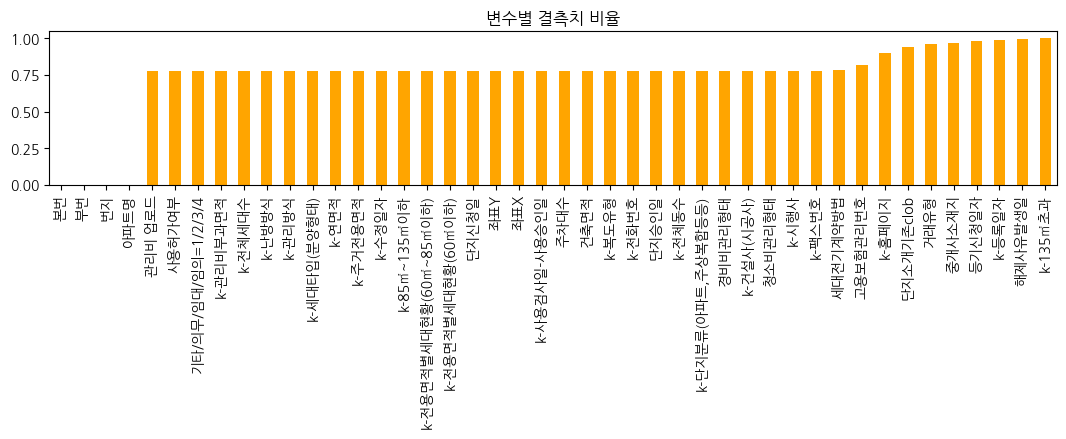

In [33]:
# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')
plt.show()

In [34]:
concat.Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº.value_counts().sum() # 6195 - ÎìúÎûçÌïòÎäî Í±∏Î°ú

6195

In [35]:
concat.Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ.value_counts()

Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ
ÏÑúÏö∏ ÎÖ∏ÏõêÍµ¨               2627
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨               2540
ÏÑúÏö∏ Í∞ïÎÇ®Íµ¨               2508
ÏÑúÏö∏ Í∞ïÎèôÍµ¨               2038
ÏÑúÏö∏ ÏÑúÏ¥àÍµ¨               1733
                     ... 
ÏÑúÏö∏ Í∞ïÎ∂ÅÍµ¨, ÏÑúÏö∏ ÏñëÏ≤úÍµ¨          1
Í≤ΩÍ∏∞ ÎÇ®ÏñëÏ£ºÏãú, Í≤ΩÍ∏∞ ÏÑ±ÎÇ®ÏàòÏ†ïÍµ¨       1
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨, Ïù∏Ï≤ú Í≥ÑÏñëÍµ¨          1
Í≤ΩÍ∏∞ Ïó∞Ï≤úÍµ∞, ÏÑúÏö∏ ÏÜ°ÌååÍµ¨          1
ÏÑúÏö∏ Ï§ëÎûëÍµ¨, Ïù∏Ï≤ú Î∂ÄÌèâÍµ¨          1
Name: count, Length: 738, dtype: int64

In [36]:
concat.Í±∞ÎûòÏú†Ìòï.value_counts()

Í±∞ÎûòÏú†Ìòï
Ï§ëÍ∞úÍ±∞Îûò    38123
ÏßÅÍ±∞Îûò      3520
Name: count, dtype: int64

- ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú Î≥º Ïàò ÏûàÎã§ÏãúÌîº Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎì§ÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä Ìï¥Îãπ ÏπºÎüºÏùò element Ï§ë 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî ÏÉÅÌô©Ïù¥ Îê©ÎãàÎã§.
- Îî∞ÎùºÏÑú Î≥∏ Baseline ÏóêÏÑúÎäî Ïù¥ ÏπºÎüºÏùÄ ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Í≥† ÌåêÎã®Ìï¥ ÏÇ≠Ï†úÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [37]:
# NullÍ∞íÏù¥ 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÏùÄ ÏÇ≠Ï†úÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() <= 1000000]))     # ÎÇ®Í≤®Ïßà Î≥ÄÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() >= 1000000]))

* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ : ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test', 'recover_num']
*

In [38]:
# ÏúÑÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§Îßå Í≥®Îùº ÏÉàÎ°úÏö¥ concat_select Í∞ùÏ≤¥Î°ú Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]

In [39]:
###
print(selected)

['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test', 'recover_num']


In [40]:
concat_select.isnull().sum()     # Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ï¥àÍ≥ºÏù∏ ÏπºÎüºÏù¥ Ï†úÍ±∞Îêú Î™®ÏäµÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
# targetÎ≥ÄÏàòÎäî test dataset Í∞úÏàòÎßåÌÅº(9272) Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨                            0
Î≤àÏßÄ                           227
Î≥∏Î≤à                            75
Î∂ÄÎ≤à                            75
ÏïÑÌååÌä∏Î™Ö                        2136
Ï†ÑÏö©Î©¥Ï†Å                           0
Í≥ÑÏïΩÎÖÑÏõî                           0
Í≥ÑÏïΩÏùº                            0
Ï∏µ                              0
Í±¥Ï∂ïÎÖÑÎèÑ                           0
ÎèÑÎ°úÎ™Ö                            0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)        877273
k-Ï†ÑÌôîÎ≤àÌò∏                    876850
k-Ìå©Ïä§Î≤àÌò∏                    879348
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              876125
k-Í¥ÄÎ¶¨Î∞©Ïãù                    876125
k-Î≥µÎèÑÏú†Ìòï                    876454
k-ÎÇúÎ∞©Î∞©Ïãù                    876125
k-Ï†ÑÏ≤¥ÎèôÏàò                    877207
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   876125
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                877637
k-ÏãúÌñâÏÇ¨                     877834
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº             876259
k-Ïó∞Î©¥Ï†Å                     876125


In [41]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎäî ÏÑ†ÌòïÎ≥¥Í∞ÑÏùÑ Ìï¥Ï£ºÍ≥†, Î≤îÏ£ºÌòïÎ≥ÄÏàòÎäî ÏïåÏàòÏóÜÍ∏∞Ïóê ‚Äúunknown‚ÄùÏù¥ÎùºÍ≥† ÏûÑÏùòÎ°ú Î≥¥Í∞ÑÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 46 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                    1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      250821 non-null   object 
 12  k-Ï†ÑÌôîÎ≤àÌò∏        

In [42]:
# Î≥∏Î≤à, Î∂ÄÎ≤àÏùò Í≤ΩÏö∞ floatÎ°ú ÎêòÏñ¥ÏûàÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÎØÄÎ°ú object(string) ÌòïÌÉúÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÍ≥† ÏïÑÎûò ÏûëÏóÖÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Î≥∏Î≤à'] = concat_select['Î≥∏Î≤à'].astype('str')
concat_select['Î∂ÄÎ≤à'] = concat_select['Î∂ÄÎ≤à'].astype('str')

In [43]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test', 'recover_num']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº']


- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïåÎßûÍ≤å ÎÇòÎàÑÏñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Ïù¥Ï†ú Í∞ÅÍ∞Å Î≥¥Í∞ÑÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [44]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)

In [45]:
concat_select.isnull().sum()         # Í≤∞Ï∏°ÏπòÍ∞Ä Î≥¥Í∞ÑÎêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

ÏãúÍµ∞Íµ¨                       0
Î≤àÏßÄ                        0
Î≥∏Î≤à                        0
Î∂ÄÎ≤à                        0
ÏïÑÌååÌä∏Î™Ö                      0
Ï†ÑÏö©Î©¥Ï†Å                      0
Í≥ÑÏïΩÎÖÑÏõî                      0
Í≥ÑÏïΩÏùº                       0
Ï∏µ                         0
Í±¥Ï∂ïÎÖÑÎèÑ                      0
ÎèÑÎ°úÎ™Ö                       0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)        0
k-Ï†ÑÌôîÎ≤àÌò∏                    0
k-Ìå©Ïä§Î≤àÌò∏                    0
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              0
k-Í¥ÄÎ¶¨Î∞©Ïãù                    0
k-Î≥µÎèÑÏú†Ìòï                    0
k-ÎÇúÎ∞©Î∞©Ïãù                    0
k-Ï†ÑÏ≤¥ÎèôÏàò                    0
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   0
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                0
k-ÏãúÌñâÏÇ¨                     0
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº             0
k-Ïó∞Î©¥Ï†Å                     0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                  0
k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å                 0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥

- BaselineÏóêÏÑúÎäî Îã®Ïàú Í≤∞Ï∏°ÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≥¥Í∞ÑÌñàÏßÄÎßå,
EDAÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò ÌùêÎ¶ÑÏùÑ Ï°∞Í∏à Îçî ÌååÏïÖÌïòÍ≥† Îçî ÎÇòÏùÄ interpolation(Î≥¥Í∞ÑÎ≤ï) Îì±Ïùò Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

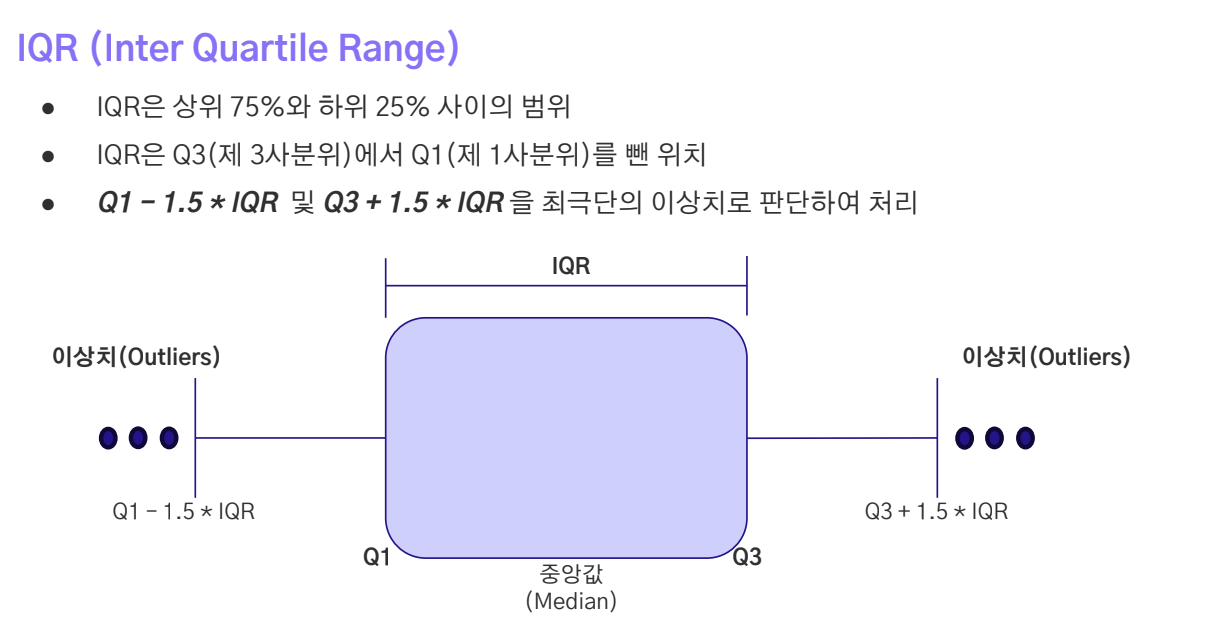

In [46]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïù¥Ï†ÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print(concat_select.shape)

(1128094, 46)


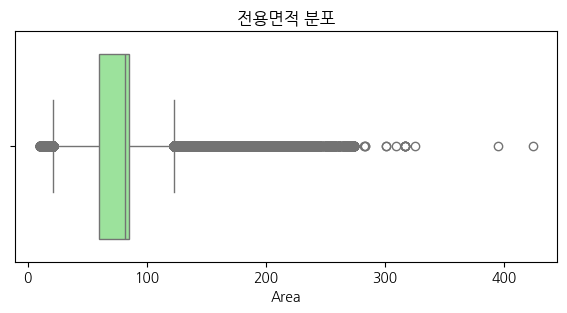

In [47]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = 'Ï†ÑÏö©Î©¥Ï†Å', color='lightgreen')
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨')
plt.xlabel('Area')
plt.show()

In [48]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test dataÏôÄ Îã§Ïãú Ìï©Ï≥êÏ£ºÍ≤†ÏäµÎãàÎã§.
    return result

In [49]:
# ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat_select = remove_outliers_iqr(concat_select, 'Ï†ÑÏö©Î©¥Ï†Å')

In [50]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÏïΩ 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÍ±∞Îêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
print(concat_select.shape)

(1038846, 46)


In [51]:
concat_select['is_test'].value_counts()     # ÎòêÌïú, train dataÎßå Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§.

is_test
0    1029574
1       9272
Name: count, dtype: int64

In [52]:
concat_select.columns

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)',
       'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)',
       'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò',
       'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
       'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY',
       'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test', 'recover

In [53]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select['Íµ¨'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])
concat_select['Îèô'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[2])
#del concat_select['ÏãúÍµ∞Íµ¨']

concat_select['Í≥ÑÏïΩÎÖÑ'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
concat_select['Í≥ÑÏïΩÏõî'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
#del concat_select['Í≥ÑÏïΩÎÖÑÏõî']

In [54]:
concat_select.columns

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)',
       'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)',
       'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò',
       'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
       'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY',
       'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test', 'recover

- ÏÑúÏö∏Ïùò ÏßëÍ∞íÏùÄ Í∞ïÎÇ®, Í∞ïÎ∂Å Ïó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Îäî ÏÇ¨Ïã§ÏùÄ ÎßéÏù¥ ÏïåÎ†§ÏßÑ ÏÇ¨Ïã§ÏûÖÎãàÎã§.
- Îî∞ÎùºÏÑú Í∞ïÎÇ®/Í∞ïÎ∂ÅÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [55]:
all = list(concat_select['Íµ¨'].unique())
gangnam = ['Í∞ïÏÑúÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [56]:
# Í∞ïÎÇ®Ïùò Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.
is_gangnam = []
for x in concat_select['Íµ¨'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎ¶ÖÎãàÎã§.
concat_select['Í∞ïÎÇ®Ïó¨Î∂Ä'] = is_gangnam

In [57]:
concat_select.columns

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)',
       'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)',
       'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò',
       'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
       'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY',
       'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test', 'recover

- ÎòêÌïú Ïã†Ï∂ïÏù∏ÏßÄ, Íµ¨Ï∂ïÏù∏ÏßÄÏùò Ïó¨Î∂ÄÎèÑ Ïã§Í±∞ÎûòÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Í±¥Ï∂ïÎÖÑÎèÑÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º Ï†úÏûëÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [58]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    1.038846e+06
mean     1.998583e+03
std      9.132471e+00
min      1.961000e+03
10%      1.987000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
90%      2.009000e+03
max      2.023000e+03
Name: Í±¥Ï∂ïÎÖÑÎèÑ, dtype: float64

In [59]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].apply(lambda x: 1 if x >= 2009 else 0)

In [60]:
concat_select.head(1)       # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏ k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï  \
0  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏  025776611  025776673           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   

  k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  \
0   Í∞úÎ≥ÑÎÇúÎ∞©     8.0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   

   k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  \
0   20204.0    22637.0                20.0                   250.0   

   k-85„é°~135„é°Ïù¥Ìïò                 k-ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0           0.0  2023-09-23 17:21:41.0     NULL      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   

     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
0  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   

         Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  is_test  recover_num  \
0  127.05721  37.476763  2022-11-17 10:19:06.0  124000        0            0   

     Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  
0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô  2017  12     1     0

In [61]:
### Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
concat_select.shape

(1038846, 52)

In [62]:
###
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038846 entries, 0 to 1128093
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1038846 non-null  object 
 1   Î≤àÏßÄ                      1038846 non-null  object 
 2   Î≥∏Î≤à                      1038846 non-null  object 
 3   Î∂ÄÎ≤à                      1038846 non-null  object 
 4   ÏïÑÌååÌä∏Î™Ö                    1038846 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                    1038846 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1038846 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1038846 non-null  int64  
 8   Ï∏µ                       1038846 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1038846 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1038846 non-null  object 
 11  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      1038846 non-null  object 
 12  k-Ï†ÑÌôîÎ≤àÌò∏             

In [63]:
###
concat_select.describe()

Ï†ÑÏö©Î©¥Ï†Å          Í≥ÑÏïΩÎÖÑÏõî           Í≥ÑÏïΩÏùº             Ï∏µ          Í±¥Ï∂ïÎÖÑÎèÑ  \
count  1.038846e+06  1.038846e+06  1.038846e+06  1.038846e+06  1.038846e+06   
mean   7.298905e+01  2.014755e+05  1.578488e+01  8.753750e+00  1.998583e+03   
std    2.068129e+01  4.254330e+02  8.718408e+00  5.748396e+00  9.132471e+00   
min    1.200000e+01  2.007010e+05  1.000000e+00 -3.000000e+00  1.961000e+03   
25%    5.960000e+01  2.011090e+05  8.000000e+00  4.000000e+00  1.992000e+03   
50%    7.750000e+01  2.015070e+05  1.600000e+01  8.000000e+00  2.000000e+03   
75%    8.493000e+01  2.018040e+05  2.300000e+01  1.200000e+01  2.005000e+03   
max    3.014700e+02  2.023090e+05  3.100000e+01  6.600000e+01  2.023000e+03   

             k-Ï†ÑÏ≤¥ÎèôÏàò       k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò         k-Ïó∞Î©¥Ï†Å      k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å     k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
count  1.038846e+06  1.038846e+06  1.038846e+06  1.038846e+06  1.038846e+06   
mean   1.055902e+01  8.789185e+02  1.171997e+05  6.853204e+04  8.860248e+04   
std    1.398622e+01  9.799221e+02  1.396973e+05  8.013150e+04  1.029439e+05   
min    1.000000e+00  5.900000e+01  0.000000e+00  2.338000e+03  0.000000e+00   
25%    3.298424e+00  2.883252e+02  4.085896e+04  2.399958e+04  3.122209e+04   
50%    6.292151e+00  5.180000e+02  7.074594e+04  4.068197e+04  5.187022e+04   
75%    1.200000e+01  9.980000e+02  1.371957e+05  7.724245e+04  1.001050e+05   
max    1.240000e+02  9.510000e+03  9.591851e+06  7.347810e+05  9.698770e+05   

       k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò          Í±¥Ï∂ïÎ©¥Ï†Å  \
count        1.038846e+06            1.038846e+06  1.038846e+06  1.038846e+06   
mean         3.547755e+02            3.702378e+02  1.175602e+02  1.175324e+05   
std          6.368078e+02            5.971913e+02  1.886305e+02  1.397584e+06   
min          0.000000e+00            0.000000e+00  0.000000e+00  0.000000e+00   
25%          3.476400e+01            9.846346e+01  0.000000e+00  0.000000e+00   
50%          1.439695e+02            2.077551e+02  3.991887e+01  1.904827e+03   
75%          3.640000e+02            3.890000e+02  1.367822e+02  5.933792e+03   
max          4.975000e+03            5.132000e+03  1.500000e+03  3.159620e+07   

               Ï£ºÏ∞®ÎåÄÏàò           Ï¢åÌëúX           Ï¢åÌëúY        target       is_test  \
count  1.038846e+06  1.038846e+06  1.038846e+06  1.038846e+06  1.038846e+06   
mean   7.584021e+02  1.269967e+02  3.755536e+01  5.271001e+04  8.925288e-03   
std    8.711735e+02  8.993476e-02  5.735042e-02  3.623517e+04  9.405124e-02   
min    0.000000e+00  1.267983e+02  3.744784e+01  0.000000e+00  0.000000e+00   
25%    2.554739e+02  1.269141e+02  3.750514e+01  3.000000e+04  0.000000e+00   
50%    4.745839e+02  1.270223e+02  3.754912e+01  4.290000e+04  0.000000e+00   
75%    9.139155e+02  1.270635e+02  3.759680e+01  6.450000e+04  0.000000e+00   
max    1.209600e+04  1.271800e+02  3.768772e+01  5.900000e+05  1.000000e+00   

        recover_num          Í∞ïÎÇ®Ïó¨Î∂Ä          Ïã†Ï∂ïÏó¨Î∂Ä  
count  1.038846e+06  1.038846e+06  1.038846e+06  
mean   5.691562e+05  3.535962e-01  1.196992e-01  
std    3.270857e+05  4.780859e-01  3.246096e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    2.862212e+05  0.000000e+00  0.000000e+00  
50%    5.718525e+05  0.000000e+00  0.000000e+00  
75%    8.542898e+05  1.000000e+00  0.000000e+00  
max    1.128093e+06  1.000000e+00  1.000000e+00

- ÏúÑ Îëê ÏÇ¨Ìï≠ Ïô∏ÏóêÎèÑ Ïô∏Î∂Ä Í≥µÍ≥µ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÍ±∞ÎÇò, EDAÎ•º ÌÜµÌï¥ Îçî ÎßéÏùÄ Î≥ÄÏàòÎ•º Ï†úÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§.

### ÏûëÏÑ±Ìïú Í≤É.

#### ÏïÑÌååÌä∏Î≥Ñ Íµ¨Î∂Ñ ÎßåÎì§Í∏∞

#### ÏïÑÌååÌä∏Î≥ÑÏóê ÌèâÏàòÎ•º 'Íµ¨Î∂Ñ' Ïª¨Îüº Ï∂îÍ∞ÄÌïòÍ∏∞

##### ÏïÑÌååÌä∏ Í±∞ÎûòÎüâ ÌôïÏù∏

#### <font color=Tomato> Ìï¥Î≥¥Î†§Îäî Í≤É 1
- ÏïÑÌååÌä∏Î≥Ñ ÏπòÏàòÎ≥ÑÎ°ú Ïó∞ Ïõî Îã®ÏúÑÎ°ú ÌèâÍ∑†Í∞íÏùÑ Í∞ÄÏßÑ Í∑∏ÎûòÌîÑ ÎßåÎì§Í∏∞
- ÏïÑÌååÌä∏Î≥Ñ ÏõîÎ≥Ñ ÏãúÍ≥ÑÏó¥ Í≤∞Ï∏°Ïπò Ï±ÑÏõåÎÑ£Í∏∞
- ÏãúÍ≥ÑÏó¥ Í¥ÄÎ†® Ïù¥ÎèôÌèâÍ∑†ÏÑ†Í≥º Í∞ÄÏ§ëÏù¥ÎèôÌèâÍ∑†ÏÑ†, ÎàÑÏ†Å Î†àÍ∑∏ÎßåÎì§Í∏∞
- ÌÉÄÏûÑ Ïä§ÌîåÎ¶øÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï™ºÍ∞úÎ°ú Î™®Îç∏ ÌïôÏäµÏãúÌÇ§Í∏∞
- ÏÉòÌîåÎßÅ Í≤∞Í≥º ÌôïÏù∏ÌïòÍ∏∞
</font>

#### <font color=Tomato> Ìï¥Î≥¥Î†§Îäî Í≤É 2
- <font color=Tomato>ÏïÑÌååÌä∏Î≥Ñ ÏπòÏàòÎ≥ÑÎ°ú Ïó∞ Ïõî Îã®ÏúÑÎ•º Í∑∏ÎûòÌîÑÎ°ú Ï†ê Ï∞çÏñ¥ÏÑú Î∂ÑÌè¨ Î≥¥Í∏∞
- Ïù¥ ÎÇ¥Ïö©Ïóê ÎåÄÌï¥ÏÑú ÏãúÍ≥ÑÏó¥Î°ú ÎêúÍ±∞ Í∑∏ÎÉ• Î∞îÎ°ú ÏòàÏ∏°ÏãúÏºúÎ≥¥Í∏∞.

<font color=Tomato> ÏúÑ ÎëêÍ∞ÄÏßÄ ÎÇ¥Ïö©Ïóê ÎåÄÌï¥ÏÑú Í≤∞Í≥ºÏπòÏóê ÎåÄÌïú ÌèâÍ∞ÄÌï¥Î≥¥Í∏∞



### ÏÉàÎ°úÏö¥ Î≥ÄÏàò ÎßåÎì§Í∏∞

[ ] Ïù¥ÎèôÌèâÍ∑†, Í∞ÄÏ§ëÏù¥ÎèôÌèâÍ∑†

[ ] ÏÑúÏö∏ ÌèâÍ∑†, Íµ¨ ÌèâÍ∑†, Îèô ÌèâÍ∑† Ï∂îÍ∞Ä






In [64]:
### ÏÉòÌîåÎßÅÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎìú
#file_path = '/content/sample.csv'  # ÌååÏùº Í≤ΩÎ°úÎ•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÏÑ∏Ïöî
#sample = pd.read_csv(file_path, encoding='cp949')

In [65]:
### 'Íµ¨Î∂Ñ' 'Íµ¨Î∂Ñdate' Ïª¨Îüº ÏÉùÏÑ±
#concat['Íµ¨Î∂Ñ'] = concat['ÏãúÍµ∞Íµ¨'] + ' ' + concat['Î≤àÏßÄ'] + ' ' + concat['ÏïÑÌååÌä∏Î™Ö']  Ï†ÑÏö©Î©¥Ï†ÅÍπåÏßÄ Ìè¨Ìï®ÏãúÏºúÏÑú Íµ¨Î∂ÑÏúºÎ°ú Î∞îÍøà
concat_select['Íµ¨Î∂Ñ'] = concat_select['ÏãúÍµ∞Íµ¨'] + ' ' + concat_select['Î≤àÏßÄ'] + ' ' + concat_select['ÏïÑÌååÌä∏Î™Ö'] + ' ' + concat_select['Ï†ÑÏö©Î©¥Ï†Å'].astype(str)
concat_select['Íµ¨Î∂Ñdate'] = concat_select['ÏãúÍµ∞Íµ¨'] + ' ' + concat_select['Î≤àÏßÄ'] + ' ' + concat_select['ÏïÑÌååÌä∏Î™Ö'] + ' ' + concat_select['Ï†ÑÏö©Î©¥Ï†Å'].astype(str) + ' ' + concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype(str)



In [66]:
### ÏïÑÌååÌä∏ Îã®ÏßÄÎ≥ÑÎ°ú Í∞ÄÏû• Ï†ÅÌï©Ìïú Î™®Îç∏ÏùÑ Ï∞æÎäî Î∞©ÏãùÏúºÎ°ú Ï†ëÍ∑º ÌïòÍ≥† Ïã∂Îã§.
### ÏïÑÌååÌä∏Î≥Ñ Ï†ÑÏö©Î©¥Ï†ÅÎ≥Ñ Í±∞ÎûòÎüâ

A = 50
B = 400

tmp = concat_select['Íµ¨Î∂Ñ'].value_counts().reset_index()
print(tmp)
print("-----------------------------------------------------------", A, "--------------------------")
tmp_50 = tmp[tmp['count'] > A]
print(tmp_50)
print("-----------------------------------------------------------", B, "--------------------------")
tmp_400 = tmp[tmp['count'] > B]
print(tmp_400)


                                       Íµ¨Î∂Ñ  count
0             ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94   2168
1             ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ Ï§ëÍ≥ÑÎèô 369 Ï£ºÍ≥µ2 44.52   1949
2              ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Ïû†Ïã§Îèô 22 Î¶¨ÏÑºÏ∏† 84.99   1755
3            ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ Ï∞ΩÎèô 38 Ï£ºÍ≥µ17Îã®ÏßÄ 36.16   1722
4      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎ∂ÅÍµ¨ ÎØ∏ÏïÑÎèô 1353 ÏóêÏä§ÏºÄÏù¥Î∂ÅÌïúÏÇ∞ÏãúÌã∞ 59.98   1719
...                                   ...    ...
30907      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨ ÏñëÌèâÎèô4Í∞Ä 196 ÏàòÏÑ±ÏòàÏà† 82.5      1
30908     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨ ÏñëÌèâÎèô4Í∞Ä 160-2 ÏïΩÏÇ∞ 34.58      1
30909     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ Î∞©ÌïôÎèô 690-3 Î∂ÄÏòÅÌå∞Î¶¨Ïä§ 79.05      1
30910  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Í∞ÄÎùΩÎèô 77-7 ÏÜ°ÌååNsuite 112.57      1
30911        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ Ìï©Ï†ïÎèô 390-5 ÎåÄÏö¥ 58.16      1

[30912 rows x 2 columns]
----------------------------------------------------------- 50 -----------------------

In [67]:
### concat_select['Íµ¨Î∂Ñnum'] ÎßåÎì§Í∏∞

mean_target = concat_select.groupby('Íµ¨Î∂Ñ')['target'].mean().reset_index()
mean_target = mean_target.sort_values(by=['Íµ¨Î∂Ñ'])

# Ïù∏Îç±Ïä§Î•º Î¶¨ÏÖãÌïòÍ≥† Í∏∞Ï°¥ Ïù∏Îç±Ïä§Î•º ÏÉàÎ°úÏö¥ Ïó¥Î°ú Ï∂îÍ∞Ä
mean_target.reset_index(drop=True, inplace=True)
mean_target['Íµ¨Î∂Ñnum'] = mean_target.index

# Î∂àÌïÑÏöîÍ∞í ÏÇ≠Ï†ú
mean_target = mean_target.drop(columns=['target'])

### ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
concat_select = pd.merge(concat_select, mean_target, on='Íµ¨Î∂Ñ', how='left')

In [151]:
### data Î≥ÄÏàò ÎßåÎì§Í∏∞

### Î∂àÌïÑÏöî Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú
data = concat_select.drop(columns=['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'ÏïÑÌååÌä∏Î™Ö', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÏãúÌñâÏÇ¨', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº'])

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038846 entries, 0 to 1038845
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Í≥ÑÏïΩÎÖÑÏõî                    1038846 non-null  int64  
 1   Ï∏µ                       1038846 non-null  int64  
 2   Í±¥Ï∂ïÎÖÑÎèÑ                    1038846 non-null  int64  
 3   ÎèÑÎ°úÎ™Ö                     1038846 non-null  object 
 4   k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      1038846 non-null  object 
 5   k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)            1038846 non-null  object 
 6   k-ÎÇúÎ∞©Î∞©Ïãù                  1038846 non-null  object 
 7   k-Ï†ÑÏ≤¥ÎèôÏàò                  1038846 non-null  float64
 8   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 1038846 non-null  float64
 9   k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              1038846 non-null  object 
 10  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº           1038846 non-null  object 
 11  k-Ïó∞Î©¥Ï†Å                   1038846 non-n

In [70]:
### Ï†ÑÏ≤¥ ÌèâÍ∑†Í∞í, ÏßÄÏó≠ ÌèâÍ∑†Í∞í ÎßåÎì§Í∏∞
# df_all['national_avg'] = df_all.groupby(['year','month'])['microbusiness_density'].transform('mean')
# df_all['state_avg'] = df_all.groupby(['state','year','month'])['microbusiness_density'].transform('mean')

#### ÏÉòÌîåÎßÅ

In [71]:
### ÏÉòÌîåÎßÅÏö© Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
#
#

# data = data.loc[data['Íµ¨Î∂Ñ'] =='ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94']

In [153]:
### ÎÇ¥Ïö©ÌôïÏù∏
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038846 entries, 0 to 1038845
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Í≥ÑÏïΩÎÖÑÏõî                    1038846 non-null  int64  
 1   Ï∏µ                       1038846 non-null  int64  
 2   Í±¥Ï∂ïÎÖÑÎèÑ                    1038846 non-null  int64  
 3   ÎèÑÎ°úÎ™Ö                     1038846 non-null  object 
 4   k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      1038846 non-null  object 
 5   k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)            1038846 non-null  object 
 6   k-ÎÇúÎ∞©Î∞©Ïãù                  1038846 non-null  object 
 7   k-Ï†ÑÏ≤¥ÎèôÏàò                  1038846 non-null  float64
 8   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 1038846 non-null  float64
 9   k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              1038846 non-null  object 
 10  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº           1038846 non-null  object 
 11  k-Ïó∞Î©¥Ï†Å                   1038846 non-n

In [154]:
### ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
len(data)

1038846

In [74]:
### Í≥ÑÏïΩÎÖÑÏõîÏùÑ intÍ∞íÏúºÎ°ú Î≥ÄÍ≤Ω, ÏãúÍ≥ÑÏó¥ Ï†ÑÌôòÏùÑ ÏúÑÌï¥
data['Í≥ÑÏïΩÎÖÑÏõî'] = data['Í≥ÑÏïΩÎÖÑÏõî'].astype(int)

In [75]:
### Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨: 'Íµ¨Î∂Ñdate'Î°ú 'Í≥ÑÏïΩÎÖÑÏõî' ÏàúÏÑúÎ°ú Ï†ïÎ†¨
final_data = data.sort_values(by=['Íµ¨Î∂Ñdate'])

In [76]:
### Ï†ïÎ†¨ Î≥ÄÍ≤ΩÎÇ¥Ïö© ÌôïÏù∏
final_data[['Íµ¨Î∂Ñdate', 'Í≥ÑÏïΩÎÖÑÏõî', 'target']].head(30)

Íµ¨Î∂Ñdate    Í≥ÑÏïΩÎÖÑÏõî  target
1007795  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   26000
1007796  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   26600
1007797  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   27800
1007798  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   23000
1007799  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   27000
1007800  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   27700
1007801  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   26500
1007802  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   30000
1007803  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   28500
1007808  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   25000
1007807  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   29200
1007806  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   24300
1007805  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   24000
1007804  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   24000
1007809  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   26100
1007810  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   25000
1007811  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   26000
1007812  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   23000
1007813  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   30000
1007814  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   28000
1007815  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   25000
1007820  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  200705   26000
1007819  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  200705   25750
1007816  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  200705   28000
1007817  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  200705   26000
1007818  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  200705   27000
1007822  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200706  200706   25400
1007821  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200706  200706   27000
1007824  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200706  200706   28000
1007823  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200706  200706   28000

In [77]:

# IQR Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÏÉÅÏπò Ï†úÍ±∞
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [78]:
len(final_data)

2168

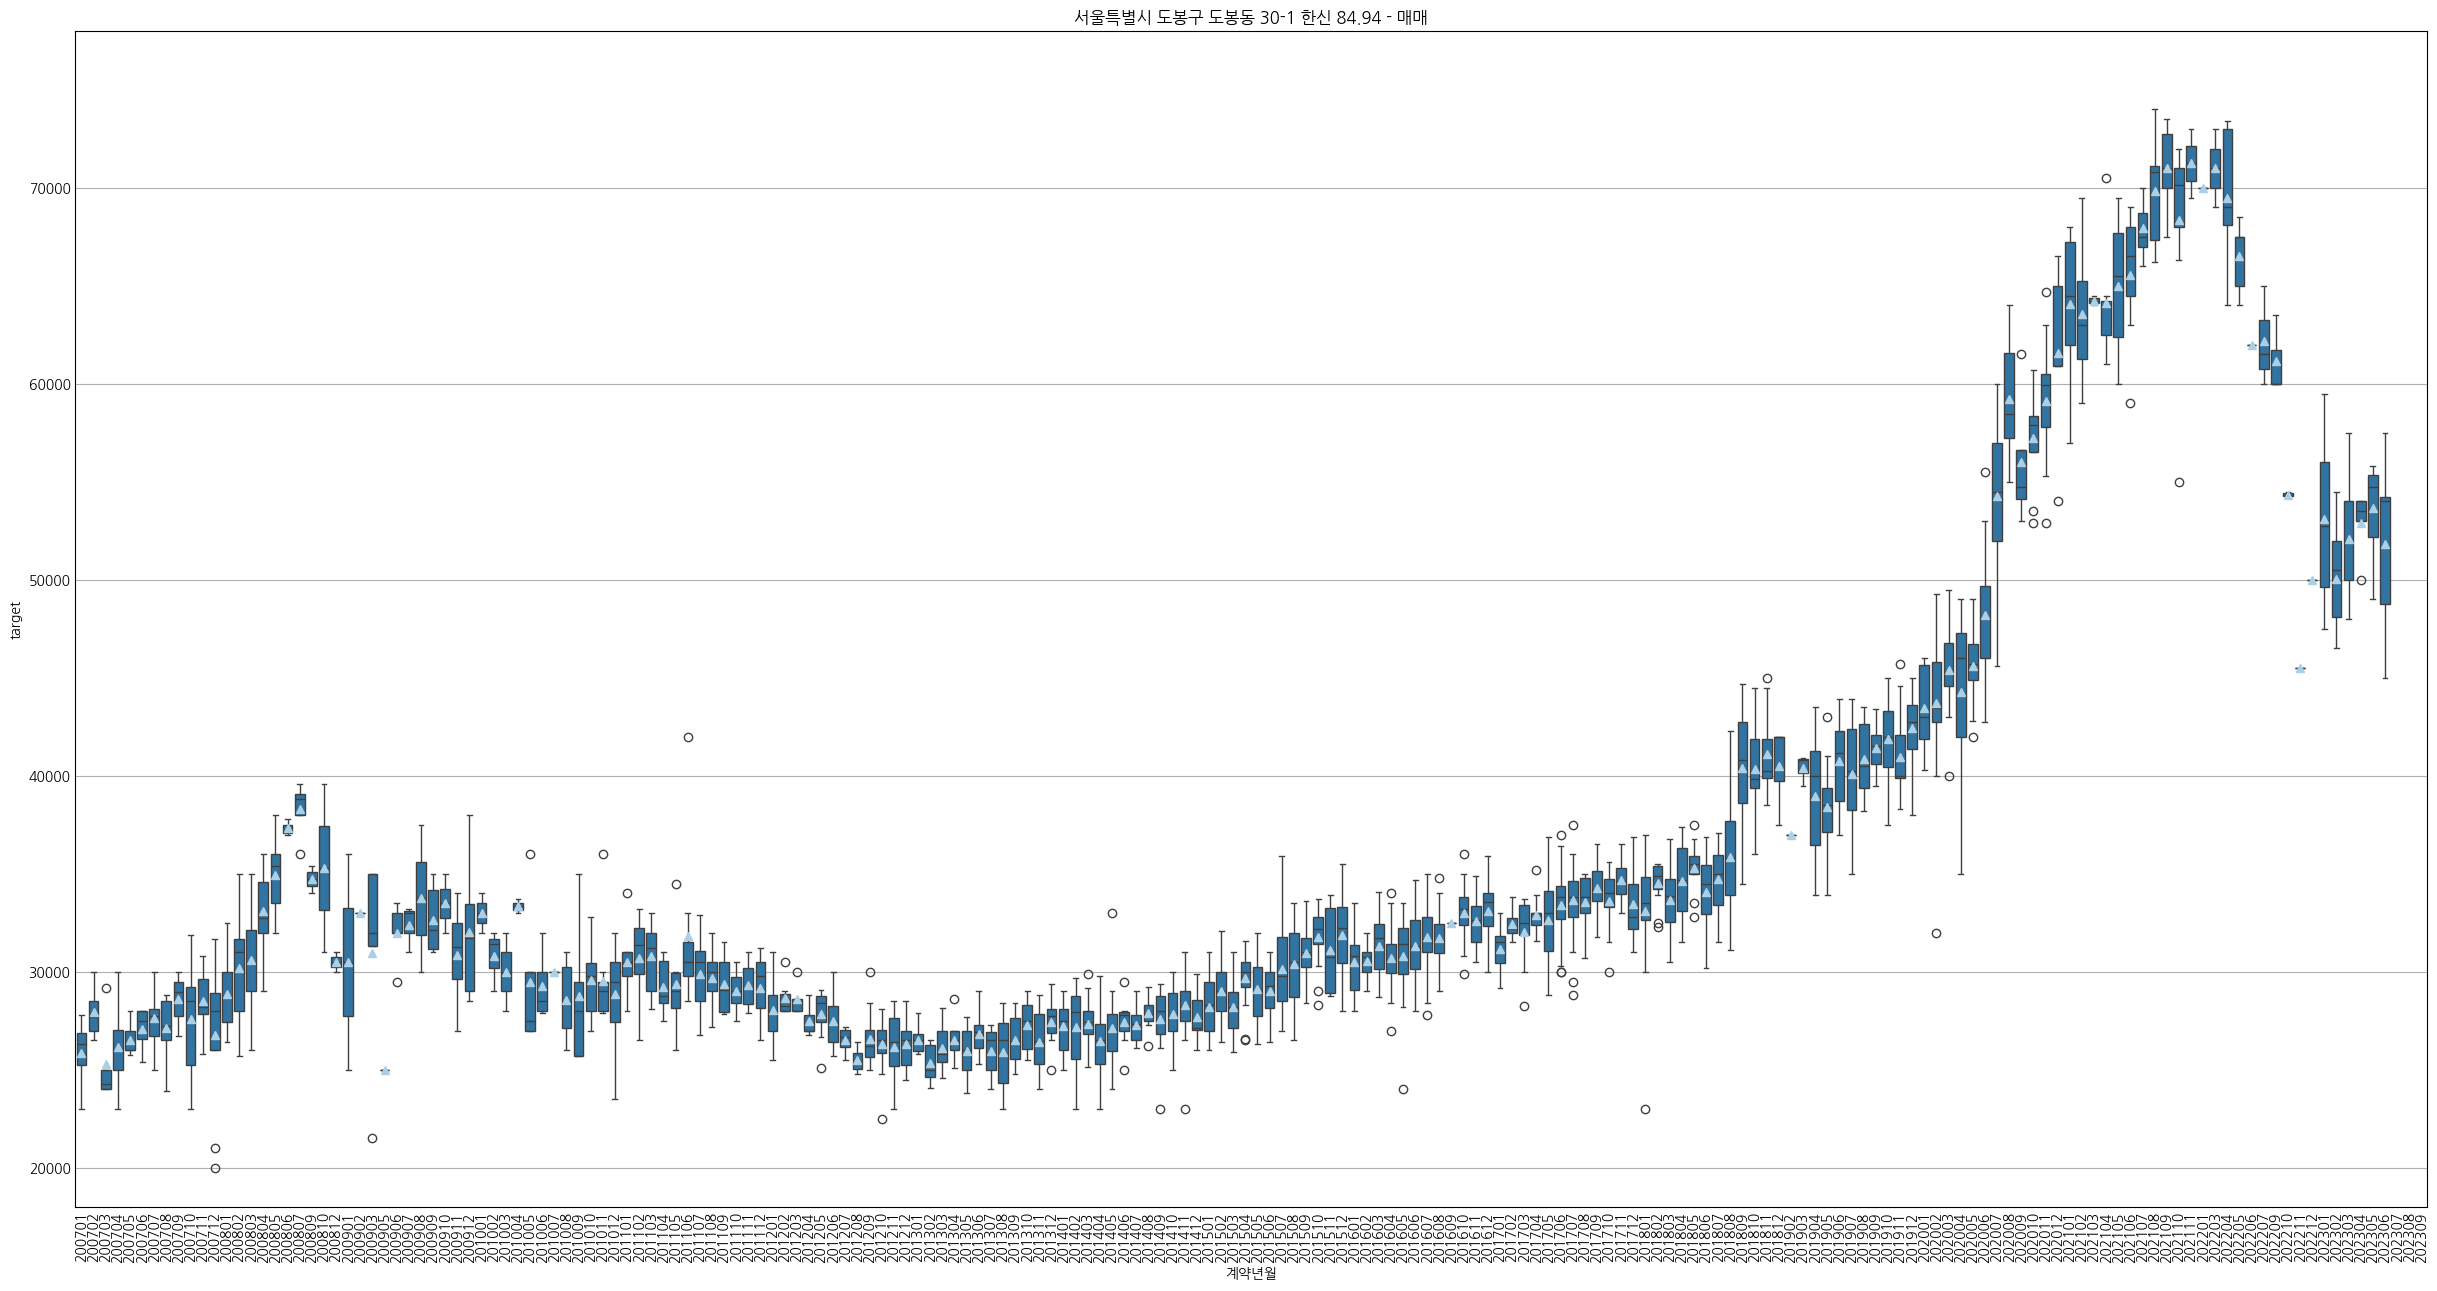

In [79]:
### Ïù¥ÏÉÅÏπò Ï†úÍ±∞Ï†Ñ ÌôïÏù∏ Î∞ïÏä§Í∑∏ÎûòÌîÑ
plt.style.use('_mpl-gallery')
figure = plt.figure(figsize=(24, 12))
plt.title('ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 - Îß§Îß§')

plt.ylim(18000, 78000)
plt.xticks(rotation=90)
sns.boxplot(x="Í≥ÑÏïΩÎÖÑÏõî", y="target", data=final_data, showmeans=True)

plt.show()

In [80]:
### Í∞Å Í≥ÑÏïΩÎÖÑÏõîÎ≥ÑÎ°ú Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ ÌèâÍ∑† Í≥ÑÏÇ∞
data_cleaned = final_data.groupby('Íµ¨Î∂Ñdate').apply(lambda x: remove_outliers(x, 'target'))
data_cleaned = data_cleaned.reset_index(drop=True)

In [81]:
### 64Í∞ú Ïù¥ÏÉÅÏπòÍ∞Ä Ï†úÍ±∞Îê®
len(data_cleaned)

2100

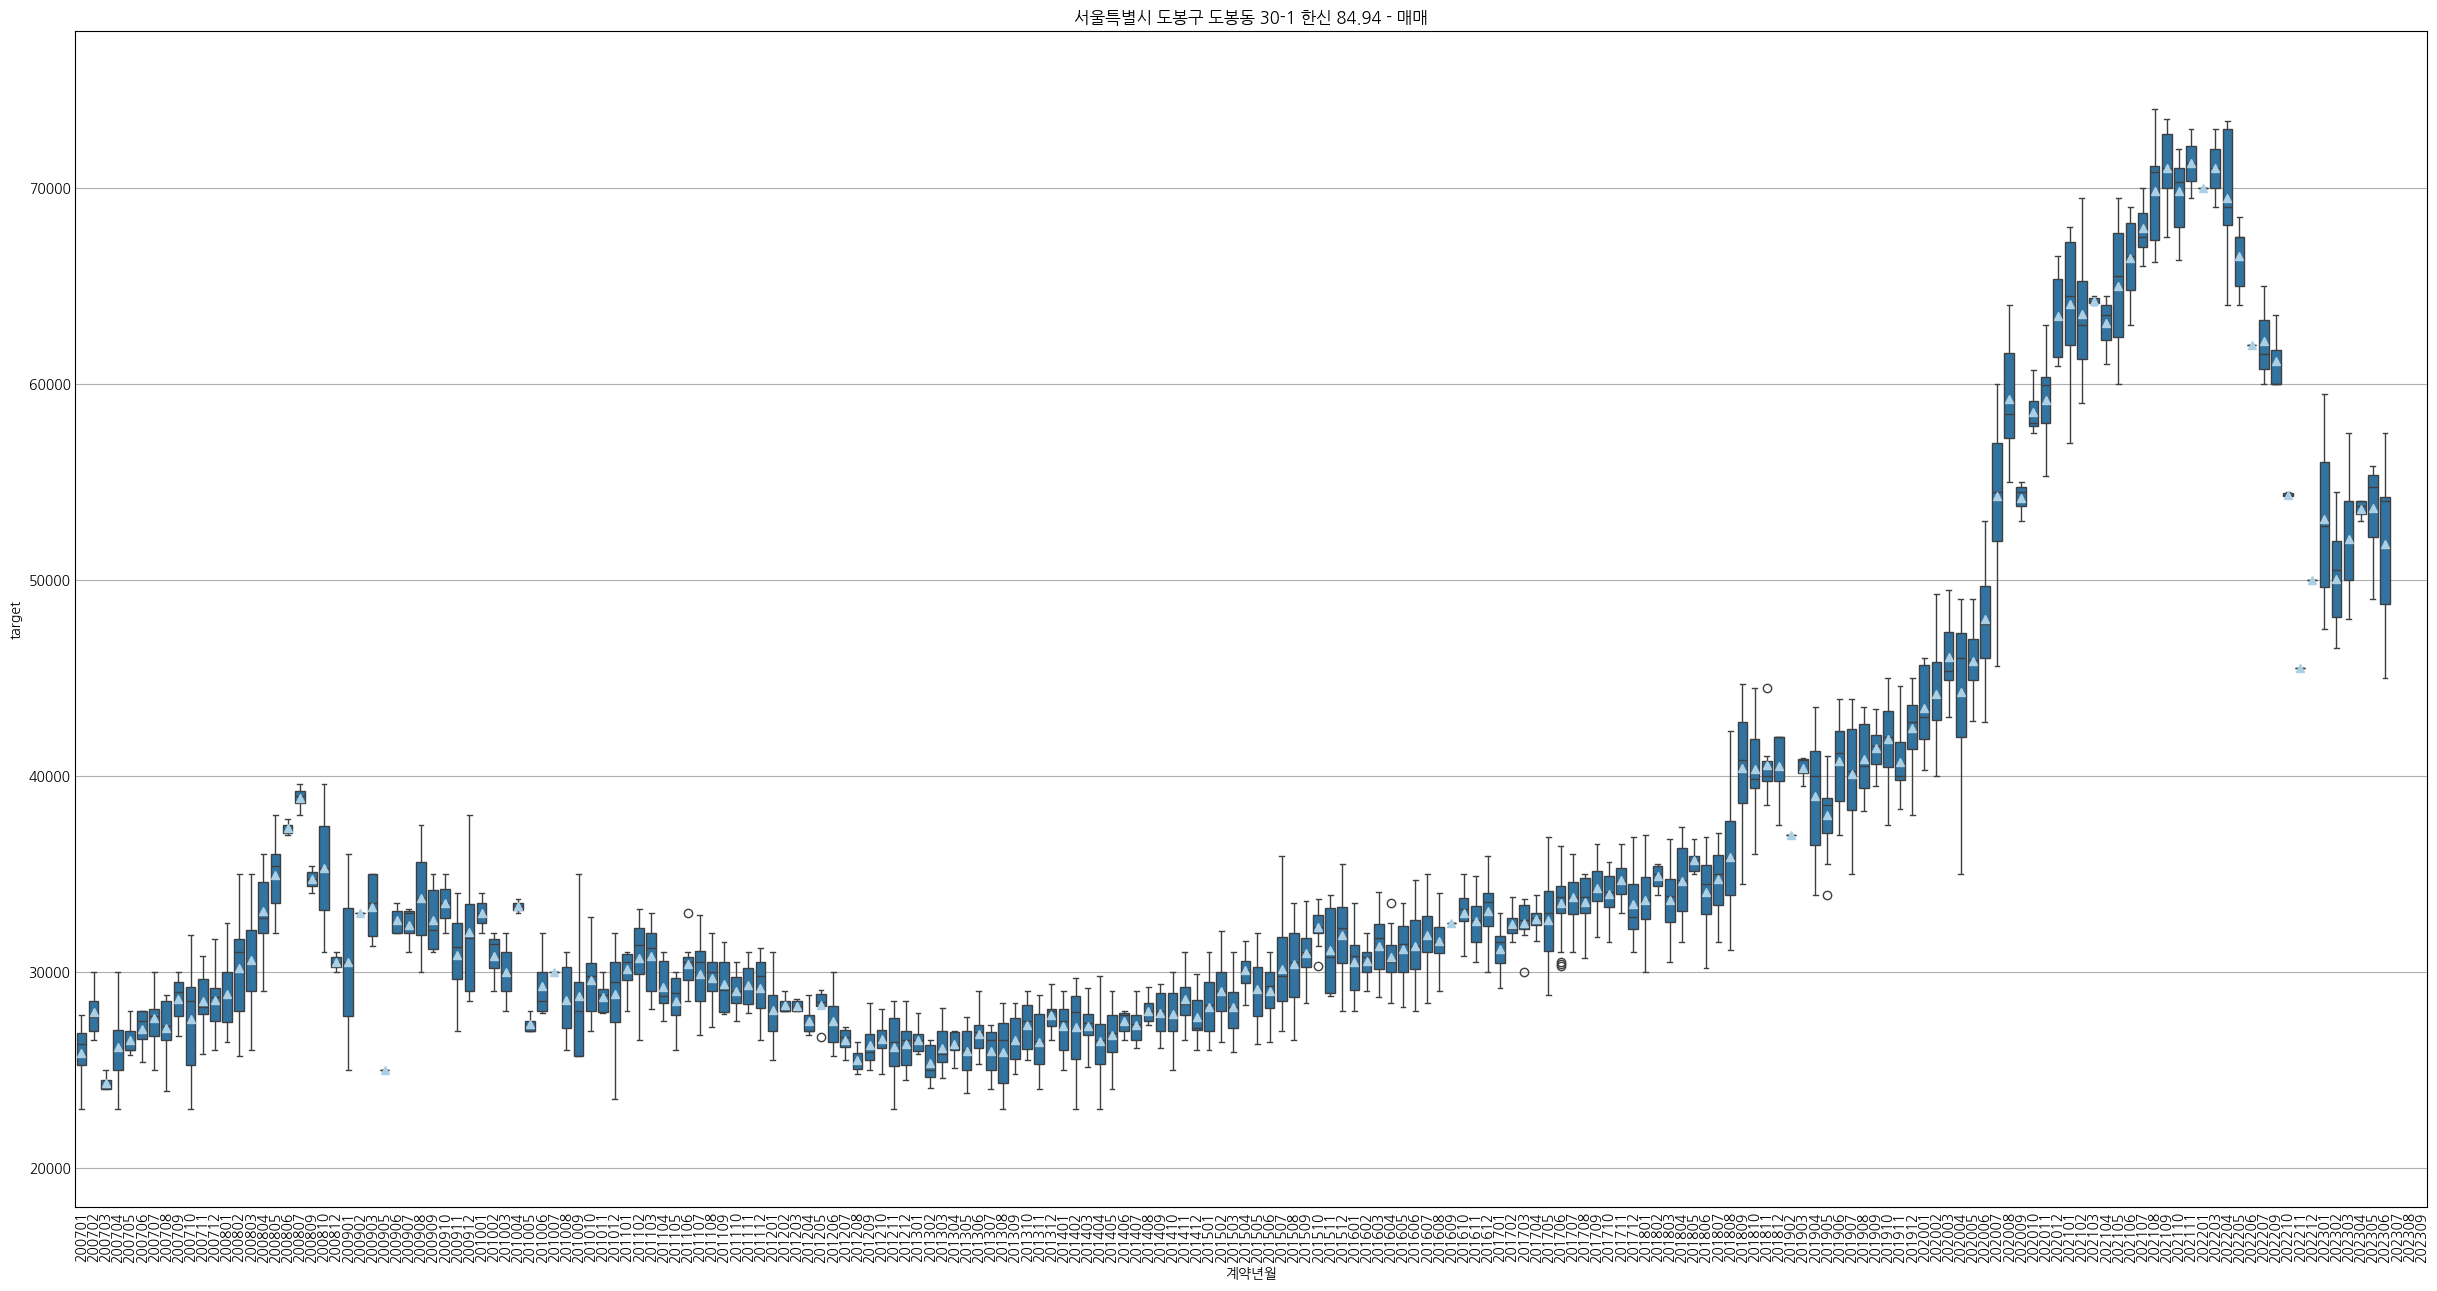

In [82]:
### Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌõÑ ÌôïÏù∏ Î∞ïÏä§Í∑∏ÎûòÌîÑ
plt.style.use('_mpl-gallery')
figure = plt.figure(figsize=(24, 12))
plt.title('ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 - Îß§Îß§')

plt.ylim(18000, 78000)
plt.xticks(rotation=90)
sns.boxplot(x="Í≥ÑÏïΩÎÖÑÏõî", y="target", data=data_cleaned, showmeans=True)

plt.show()

In [83]:
### Î≥ÄÍ≤ΩÎÇ¥Ïö© ÌôïÏù∏
data_cleaned[['Íµ¨Î∂Ñdate', 'Í≥ÑÏïΩÎÖÑÏõî', 'target']].head(20)

Íµ¨Î∂Ñdate    Í≥ÑÏïΩÎÖÑÏõî  target
0   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   26000
1   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   26600
2   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   27800
3   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   23000
4   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   27000
5   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   27700
6   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   26500
7   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   30000
8   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   28500
9   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   25000
10  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   24300
11  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   24000
12  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   24000
13  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   26100
14  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   25000
15  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   26000
16  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   23000
17  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   30000
18  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   28000
19  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  200704   25000

In [84]:
### Í≥ÑÏïΩÎÖÑÏõî Î≥Ñ targetÏùò ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
mean_target = data_cleaned.groupby('Íµ¨Î∂Ñdate')['target'].mean().reset_index()
mean_target.columns = ['Íµ¨Î∂Ñdate', 'mean']

mean_target.head()

Íµ¨Î∂Ñdate          mean
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.000000
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  27940.000000
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  24325.000000
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  26157.142857
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  26550.000000

In [85]:
### Ïù¥ÎèôÌèâÍ∑†Í≥º ÏßÄÏàòÏù¥ÎèôÌèâÍ∑†ÏùÑ Íµ¨ÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.
### SMAÏôÄ EMAÎäî Î™®Îëê ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Ï∂îÏÑ∏ ÏßÄÌëúÏûÖÎãàÎã§. SMAÎäî Î™®Îì† Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïóê ÎèôÏùºÌïú Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ÌïòÎäî Î∞òÎ©¥, EMAÎäî ÏµúÍ∑º Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïóê Îçî ÎßéÏùÄ Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.

def moving_average(df,i, n):
    MA = pd.Series(df[i].rolling(n, min_periods=n).mean(), name = 'MA_' + str(n))
    df = df.join(MA)
    return df

def weighted_moving_average(df,i, n):
    EMA = pd.Series(df[i].ewm(span=n, adjust=False, min_periods=n).mean(), name = 'EMA_' + str(n))
    df = df.join(EMA)
    return df

In [86]:
### Î≥ÄÏàòÎ•º ÏÉùÏÑ±
df_all = mean_target

# ÏãúÍ∞Ñ ÏãúÍ≥ÑÏó¥ Í∏∞Î∞ò Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
# Ïù¥Îèô ÌèâÍ∑†(Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
df_all = moving_average(df_all, 'mean', 3)
df_all = moving_average(df_all, 'mean', 6)

# ÏßÄÏàò Ïù¥Îèô ÌèâÍ∑†(Exponential Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
df_all = weighted_moving_average(df_all, 'mean', 3)
df_all = weighted_moving_average(df_all, 'mean', 6)

In [87]:
### ÏÉùÏÑ±Î≥ÄÏàò ÌôïÏù∏
df_all[['Íµ¨Î∂Ñdate','mean', 'MA_3', 'MA_6', 'EMA_3','EMA_6']].head(10)

Íµ¨Î∂Ñdate          mean          MA_3  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.000000           NaN   
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  27940.000000           NaN   
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  24325.000000  26038.333333   
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  26157.142857  26140.714286   
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  26550.000000  25677.380952   
5  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200706  27100.000000  26602.380952   
6  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200707  27665.625000  27105.208333   
7  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200708  27112.500000  27292.708333   
8  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200709  28608.333333  27795.486111   
9  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200710  27595.454545  27772.095960   

           MA_6         EMA_3         EMA_6  
0           NaN           NaN           NaN  
1           NaN           NaN           NaN  
2           NaN  25610.000000           NaN  
3           NaN  25883.571429           NaN  
4           NaN  26216.785714           NaN  
5  26320.357143  26658.392857  26391.426191  
6  26622.961310  27162.008929  26755.482994  
7  26485.044643  27137.254464  26857.487853  
8  27198.933532  27872.793899  27357.729419  
9  27438.652146  27734.124222  27425.650883

In [88]:
### Î≥ÄÌôîÏú® Ï∂îÍ∞Ä
# add 'pct_change_before' variable. This variable shows that how the density changed previous month.
df_all['pct_change_before'] = df_all['mean'].pct_change().shift(1)

In [89]:
df_all

Íµ¨Î∂Ñdate          mean          MA_3  \
0    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.000000           NaN   
1    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  27940.000000           NaN   
2    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  24325.000000  26038.333333   
3    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  26157.142857  26140.714286   
4    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  26550.000000  25677.380952   
..                                  ...           ...           ...   
189  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202305  53650.000000  53119.444444   
190  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202306  51812.500000  53029.166667   
191  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202307      0.000000  35154.166667   
192  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202308      0.000000  17270.833333   
193  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202309      0.000000      0.000000   

             MA_6         EMA_3         EMA_6  pct_change_before  
0             NaN           NaN           NaN                NaN  
1             NaN           NaN           NaN                NaN  
2             NaN  25610.000000           NaN           0.080851  
3             NaN  25883.571429           NaN          -0.129384  
4             NaN  26216.785714           NaN           0.075319  
..            ...           ...           ...                ...  
189  52085.000000  53121.302372  53236.596257           0.029600  
190  52387.083333  52466.901186  52829.711612           0.000466  
191  43532.916667  26233.450593  37735.508294          -0.034250  
192  35195.138889  13116.725297  26953.934496          -1.000000  
193  26514.583333   6558.362648  19252.810354                NaN  

[194 rows x 7 columns]

In [90]:
### Î†àÍ∑∏Í∞í Ï∂îÍ∞Ä

# gnerate lag date

def lag_feature(df, value):
    for lag in range(1, value):
        df[f'lag_mean_{lag}'] = df['mean'].shift(lag)
        df[f'lag_mean_{lag}'] = df[f'lag_mean_{lag}'].bfill()

    return df

df_all = lag_feature(df_all, 6)


In [91]:
# Í≤∞Í≥º ÌôïÏù∏
df_all

Íµ¨Î∂Ñdate          mean          MA_3  \
0    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.000000           NaN   
1    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  27940.000000           NaN   
2    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  24325.000000  26038.333333   
3    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  26157.142857  26140.714286   
4    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  26550.000000  25677.380952   
..                                  ...           ...           ...   
189  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202305  53650.000000  53119.444444   
190  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202306  51812.500000  53029.166667   
191  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202307      0.000000  35154.166667   
192  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202308      0.000000  17270.833333   
193  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202309      0.000000      0.000000   

             MA_6         EMA_3         EMA_6  pct_change_before  \
0             NaN           NaN           NaN                NaN   
1             NaN           NaN           NaN                NaN   
2             NaN  25610.000000           NaN           0.080851   
3             NaN  25883.571429           NaN          -0.129384   
4             NaN  26216.785714           NaN           0.075319   
..            ...           ...           ...                ...   
189  52085.000000  53121.302372  53236.596257           0.029600   
190  52387.083333  52466.901186  52829.711612           0.000466   
191  43532.916667  26233.450593  37735.508294          -0.034250   
192  35195.138889  13116.725297  26953.934496          -1.000000   
193  26514.583333   6558.362648  19252.810354                NaN   

       lag_mean_1    lag_mean_2    lag_mean_3    lag_mean_4    lag_mean_5  
0    25850.000000  25850.000000  25850.000000  25850.000000  25850.000000  
1    25850.000000  25850.000000  25850.000000  25850.000000  25850.000000  
2    27940.000000  25850.000000  25850.000000  25850.000000  25850.000000  
3    24325.000000  27940.000000  25850.000000  25850.000000  25850.000000  
4    26157.142857  24325.000000  27940.000000  25850.000000  25850.000000  
..            ...           ...           ...           ...           ...  
189  53625.000000  52083.333333  50026.666667  53125.000000  50000.000000  
190  53650.000000  53625.000000  52083.333333  50026.666667  53125.000000  
191  51812.500000  53650.000000  53625.000000  52083.333333  50026.666667  
192      0.000000  51812.500000  53650.000000  53625.000000  52083.333333  
193      0.000000      0.000000  51812.500000  53650.000000  53625.000000  

[194 rows x 12 columns]

In [92]:
### Í≥ÑÏïΩÎÖÑÏõîÎ≥ÑÎ°ú ÌïòÎÇòÏùò Í∞íÎßå ÎÇ®Í∏∞Í∏∞ ÏúÑÌï¥ Ï≤´ Î≤àÏß∏ Ìñâ ÏÑ†ÌÉù : Î∂àÌïÑÏöîÌï¥Ïßê
###
# final_data = data.drop_duplicates(subset='Í≥ÑÏïΩÎÖÑÏõî').copy()
# final_data = final_data.sort_values(by=['Íµ¨Î∂Ñ','Í≥ÑÏïΩÎÖÑÏõî'])
# final_data


In [93]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2168 entries, 1007795 to 1033312
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Í≥ÑÏïΩÎÖÑÏõî                    2168 non-null   int64  
 1   Ï∏µ                       2168 non-null   int64  
 2   Í±¥Ï∂ïÎÖÑÎèÑ                    2168 non-null   int64  
 3   ÎèÑÎ°úÎ™Ö                     2168 non-null   object 
 4   k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      2168 non-null   object 
 5   k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)            2168 non-null   object 
 6   k-ÎÇúÎ∞©Î∞©Ïãù                  2168 non-null   object 
 7   k-Ï†ÑÏ≤¥ÎèôÏàò                  2168 non-null   float64
 8   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 2168 non-null   float64
 9   k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              2168 non-null   object 
 10  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº           2168 non-null   object 
 11  k-Ïó∞Î©¥Ï†Å                   2168 non-null   float64
 12  k-Ï£ºÍ±∞Ï†ÑÏ

In [94]:
# ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïóê ÏÉàÎ°úÎßåÎì† Î≥ÄÏàò Ï∂îÍ∞Ä
final_data = pd.merge(data_cleaned, df_all, on='Íµ¨Î∂Ñdate', how='left')


In [95]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Í≥ÑÏïΩÎÖÑÏõî                    2100 non-null   int64  
 1   Ï∏µ                       2100 non-null   int64  
 2   Í±¥Ï∂ïÎÖÑÎèÑ                    2100 non-null   int64  
 3   ÎèÑÎ°úÎ™Ö                     2100 non-null   object 
 4   k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      2100 non-null   object 
 5   k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)            2100 non-null   object 
 6   k-ÎÇúÎ∞©Î∞©Ïãù                  2100 non-null   object 
 7   k-Ï†ÑÏ≤¥ÎèôÏàò                  2100 non-null   float64
 8   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 2100 non-null   float64
 9   k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              2100 non-null   object 
 10  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº           2100 non-null   object 
 11  k-Ïó∞Î©¥Ï†Å                   2100 non-null   float64
 12  k-Ï£ºÍ±∞Ï†ÑÏö©Î©

#### Í≥ÑÏÜç

In [96]:
### Ìï®ÏàòÎ°ú ÎßåÎì§Í∏∞
def add_lag_feature(data): # df = ÏïÑÌååÌä∏Î≥Ñ Îç∞Ïù¥ÌÑ∞,
    data['Í≥ÑÏïΩÎÖÑÏõî'] = data['Í≥ÑÏïΩÎÖÑÏõî'].astype(int)
    final_data = data.sort_values(by=['Íµ¨Î∂Ñdate'])

    ### Í∞Å Í≥ÑÏïΩÎÖÑÏõîÎ≥ÑÎ°ú Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ ÌèâÍ∑† Í≥ÑÏÇ∞
    data_cleaned = final_data.groupby('Íµ¨Î∂Ñdate').apply(lambda x: remove_outliers(x, 'target'))
    data_cleaned = data_cleaned.reset_index(drop=True)

    mean_target = data_cleaned.groupby('Íµ¨Î∂Ñdate')['target'].mean().reset_index()
    mean_target.columns = ['Íµ¨Î∂Ñdate', 'mean']

    df_all = mean_target

    # ÏãúÍ∞Ñ ÏãúÍ≥ÑÏó¥ Í∏∞Î∞ò Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    # Ïù¥Îèô ÌèâÍ∑†(Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    df_all = moving_average(df_all, 'mean', 3)
    df_all = moving_average(df_all, 'mean', 6)

    # ÏßÄÏàò Ïù¥Îèô ÌèâÍ∑†(Exponential Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    df_all = weighted_moving_average(df_all, 'mean', 3)
    df_all = weighted_moving_average(df_all, 'mean', 6)

    df_all = lag_feature(df_all, 6)

    final_data = pd.merge(data_cleaned, df_all, on='Íµ¨Î∂Ñdate', how='left')

    return final_data

In [155]:
data['Íµ¨Î∂Ñnum'].value_counts()

Íµ¨Î∂Ñnum
12200    2168
11989    1949
22729    1755
12768    1722
4238     1719
         ... 
25535       1
25528       1
12358       1
21668       1
16484       1
Name: count, Length: 30912, dtype: int64

In [156]:
%%time
###
# 12200	'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94'
# Ï†ÑÏ≤¥ ÏïÑÌååÌä∏ Í∞úÏàò 30912
END = 30911
z = END
base = add_lag_feature(data.loc[data['Íµ¨Î∂Ñnum'] == 0])

for i in range(1, z):
    tmp = add_lag_feature(data.loc[data['Íµ¨Î∂Ñnum'] == i])
    print(end="\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b")

    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ìï©
    base = pd.concat([base, tmp], ignore_index=True)
    print("i:", i, "   tmp count:", len(tmp), "   base count:",len(base))


# 2ÏãúÍ∞Ñ 13Î∂Ñ 12Ï¥à Í±∏Î¶º
# Wall time: 2h 12min 12s 2024 07 17
#display(base)

Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
i: 25913    tmp count: 36    base count: 918180
i: 25914    tmp count: 19    base count: 918199
i: 25915    tmp count: 48    base count: 918247
i: 25916    tmp count: 12    base count: 918259
i: 25917    tmp count: 10    base count: 918269
i: 25918    tmp count: 1    base count: 918270
i: 25919    tmp count: 1    base count: 918271
i: 25920    tmp count: 8    base count: 918279
i: 25921    tmp count: 52    base count: 918331
i: 2592

In [157]:
base.to_csv('/content/drive/MyDrive/AILAB_Advance/base.csv', index=False)

In [100]:
# base = pd.read_csv('/content/drive/MyDrive/AILAB_Advance/base.csv')

In [101]:
# base = base.sort_values(by=['recover_num'])

In [158]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018088 entries, 0 to 1018087
Data columns (total 43 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Í≥ÑÏïΩÎÖÑÏõî                    1018088 non-null  int64  
 1   Ï∏µ                       1018088 non-null  int64  
 2   Í±¥Ï∂ïÎÖÑÎèÑ                    1018088 non-null  int64  
 3   ÎèÑÎ°úÎ™Ö                     1018088 non-null  object 
 4   k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      1018088 non-null  object 
 5   k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)            1018088 non-null  object 
 6   k-ÎÇúÎ∞©Î∞©Ïãù                  1018088 non-null  object 
 7   k-Ï†ÑÏ≤¥ÎèôÏàò                  1018088 non-null  float64
 8   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 1018088 non-null  float64
 9   k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              1018088 non-null  object 
 10  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº           1018088 non-null  object 
 11  k-Ïó∞Î©¥Ï†Å                   1018088 non-n

In [103]:
row_at_index_10 = base.iloc[0]['Íµ¨Î∂Ñdate']
print("\nRow at index 10 using iloc:")
print(row_at_index_10)


Row at index 10 using iloc:
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701


In [104]:
# Ïó¥ AÏùò Í∞íÏù¥ 10Ïù∏ Ìñâ ÌïÑÌÑ∞ÎßÅ
a = concat_select[concat_select['recover_num'] == 0]

# Í≤∞Í≥º ÌôïÏù∏
a

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏ k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï  \
0  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏  025776611  025776673           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   

  k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  \
0   Í∞úÎ≥ÑÎÇúÎ∞©     8.0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   

   k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  \
0   20204.0    22637.0                20.0                   250.0   

   k-85„é°~135„é°Ïù¥Ìïò                 k-ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0           0.0  2023-09-23 17:21:41.0     NULL      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   

     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
0  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   

         Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  is_test  recover_num  \
0  127.05721  37.476763  2022-11-17 10:19:06.0  124000        0            0   

     Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä                                Íµ¨Î∂Ñ  \
0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô  2017  12     1     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 658-1 Í∞úÌè¨6Ï∞®Ïö∞ÏÑ± 79.97   

                                    Íµ¨Î∂Ñdate  Íµ¨Î∂Ñnum  
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 658-1 Í∞úÌè¨6Ï∞®Ïö∞ÏÑ± 79.97 201712    160

In [105]:
### Îç∞Ïù¥ÌÑ∞ ÏàúÏÑú Í∞í merge ÏãúÌÇ§Í∏∞
#base2 = pd.merge(base, concat_select[['recover_num']], on='index', how='left')

In [106]:
len(base)

2100

In [107]:
base.head()

Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ         ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-ÎÇúÎ∞©Î∞©Ïãù  \
0  200701   4  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
1  200701  15  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
2  200701  14  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
3  200701   1  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
4  200702   1  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   

      k-Ï†ÑÏ≤¥ÎèôÏàò      k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº          k-Ïó∞Î©¥Ï†Å  \
0  15.915509  1326.793403       NULL          NULL  228944.608218   
1  15.916667  1326.125000       NULL          NULL  228978.791667   
2  15.917824  1325.456597       NULL          NULL  229012.975116   
3  15.918981  1324.788194       NULL          NULL  229047.158565   
4  15.920139  1324.119792       NULL          NULL  229081.342014   

        k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  \
0  125842.750579          261.770255              582.314815    404.172454   
1  125848.041667          260.458333              582.666667    404.416667   
2  125853.332755          259.146412              583.018519    404.660880   
3  125858.623843          257.834491              583.370370    404.905093   
4  125863.914931          256.522569              583.722222    405.149306   

  k-ÏàòÏ†ïÏùºÏûê          Í±¥Ï∂ïÎ©¥Ï†Å         Ï£ºÏ∞®ÎåÄÏàò         Ï¢åÌëúX        Ï¢åÌëúY  target  is_test  \
0   NULL  16880.982089  1904.994213  127.048670  37.664560   26000        0   
1   NULL  16787.030417  1905.583333  127.048659  37.664574   26600        0   
2   NULL  16693.078744  1906.172454  127.048648  37.664587   27800        0   
3   NULL  16599.127072  1906.761574  127.048637  37.664600   23000        0   
4   NULL  16505.175399  1907.350694  127.048626  37.664613   27000        0   

   recover_num    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä                           Íµ¨Î∂Ñ  \
0      1096154  ÎèÑÎ¥âÍµ¨  ÎèÑÎ¥âÎèô  2007  01     0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94   
1      1096155  ÎèÑÎ¥âÍµ¨  ÎèÑÎ¥âÎèô  2007  01     0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94   
2      1096156  ÎèÑÎ¥âÍµ¨  ÎèÑÎ¥âÎèô  2007  01     0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94   
3      1096157  ÎèÑÎ¥âÍµ¨  ÎèÑÎ¥âÎèô  2007  01     0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94   
4      1096158  ÎèÑÎ¥âÍµ¨  ÎèÑÎ¥âÎèô  2007  02     0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94   

   Íµ¨Î∂Ñnum                              Íµ¨Î∂Ñdate     mean  MA_3  MA_6  EMA_3  \
0  12200  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.0   NaN   NaN    NaN   
1  12200  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.0   NaN   NaN    NaN   
2  12200  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.0   NaN   NaN    NaN   
3  12200  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.0   NaN   NaN    NaN   
4  12200  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  27940.0   NaN   NaN    NaN   

   EMA_6  lag_mean_1  lag_mean_2  lag_mean_3  lag_mean_4  lag_mean_5  
0    NaN     25850.0     25850.0     25850.0     25850.0     25850.0  
1    NaN     25850.0     25850.0     25850.0     25850.0     25850.0  
2    NaN     25850.0     25850.0     25850.0     25850.0     25850.0  
3    NaN     25850.0     25850.0     25850.0     25850.0     25850.0  
4    NaN     25850.0     25850.0     25850.0     25850.0     25850.0

In [108]:
display(base)

Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ         ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-ÎÇúÎ∞©Î∞©Ïãù  \
0     200701   4  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
1     200701  15  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
2     200701  14  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
3     200701   1  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
4     200702   1  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
...      ...  ..   ...         ...                ...          ...    ...   
2095  202308   9  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
2096  202308   8  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
2097  202308   2  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
2098  202309  17  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   
2099  202309  15  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   

         k-Ï†ÑÏ≤¥ÎèôÏàò      k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº          k-Ïó∞Î©¥Ï†Å  \
0     15.915509  1326.793403       NULL          NULL  228944.608218   
1     15.916667  1326.125000       NULL          NULL  228978.791667   
2     15.917824  1325.456597       NULL          NULL  229012.975116   
3     15.918981  1324.788194       NULL          NULL  229047.158565   
4     15.920139  1324.119792       NULL          NULL  229081.342014   
...         ...          ...        ...           ...            ...   
2095   9.921569   731.862745       NULL          NULL  107325.921569   
2096   9.916667   732.291667       NULL          NULL  107393.041667   
2097   9.911765   732.720588       NULL          NULL  107460.161765   
2098   9.906863   733.149510       NULL          NULL  107527.281863   
2099   9.901961   733.578431       NULL          NULL  107594.401961   

           k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  \
0     125842.750579          261.770255              582.314815    404.172454   
1     125848.041667          260.458333              582.666667    404.416667   
2     125853.332755          259.146412              583.018519    404.660880   
3     125858.623843          257.834491              583.370370    404.905093   
4     125863.914931          256.522569              583.722222    405.149306   
...             ...                 ...                     ...           ...   
2095   56653.960784          208.450980              384.784314    138.627451   
2096   56667.833333          209.166667              384.708333    138.416667   
2097   56681.705882          209.882353              384.632353    138.205882   
2098   56695.578431          210.598039              384.556373    137.995098   
2099   56709.450980          211.313725              384.480392    137.784314   

     k-ÏàòÏ†ïÏùºÏûê          Í±¥Ï∂ïÎ©¥Ï†Å         Ï£ºÏ∞®ÎåÄÏàò         Ï¢åÌëúX        Ï¢åÌëúY  target  \
0      NULL  16880.982089  1904.994213  127.048670  37.664560   26000   
1      NULL  16787.030417  1905.583333  127.048659  37.664574   26600   
2      NULL  16693.078744  1906.172454  127.048648  37.664587   27800   
3      NULL  16599.127072  1906.761574  127.048637  37.664600   23000   
4      NULL  16505.175399  1907.350694  127.048626  37.664613   27000   
...     ...           ...          ...         ...        ...     ...   
2095   NULL    237.330196   885.431373  127.046904  37.573511       0   
2096   NULL    252.163333   885.958333  127.046950  37.573564       0   
2097   NULL    266.996471   886.485294  127.046996  37.573616       0   
2098   NULL    281.829608   887.012255  127.047042  37.573669       0   
2099   NULL    296.662745   887.539216  127.047088  37.573722       0   

      is_test  recover_num    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä

## 5 . Model Training

- Ïù¥Ï†ú ÏúÑÏóêÏÑú ÎßåÎì† ÌååÏÉùÎ≥ÄÏàòÎì§Í≥º Ï†ïÏ†úÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
- Î™®Îç∏ÎßÅÏóêÎäî `sklearn`Ïùò `RandomForest`Î•º Ïù¥Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - `RandomForest`Îäî Î∞∞ÍπÖ(Bagging)Ïùò ÏùºÏ¢ÖÏúºÎ°ú, ÌïôÏäµÏãúÌÇ§Îäî Îç∞Ïù¥ÌÑ∞ Îøê ÏïÑÎãàÎùº ÌäπÏÑ±Î≥ÄÏàò(X)Îì§ÎèÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï¥ Ìä∏Î¶¨Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏÑúÎ°ú Îã§Î•∏ NÍ∞úÏùò Tree ÏÉùÏÑ±ÌïòÍ≥†, NÍ∞úÏùò TreeÏóêÏÑú Î∞úÏÉùÌïú OutputÏùÑ Voting(Î≤îÏ£ºÌòï, Î∂ÑÎ•òÎ¨∏Ï†ú)ÌïòÍ±∞ÎÇò, Average(Ïó∞ÏÜçÌòï, ÌöåÍ∑ÄÎ¨∏Ï†ú)Ìï¥ ÏµúÏ¢Ö Output ÏÉùÏÑ±Ìï©ÎãàÎã§.
  - Ïù¥Îäî High variance, Low bias ÏÉÅÌô©ÏóêÏÑú Î∂ÑÏÇ∞(Variance) Í∞êÏÜåÏóê ÎèÑÏõÄÏùÑ Ï§çÎãàÎã§.

In [109]:
### ÏÇ¨Ïö©ÏïàÌï® ÏïÑÎûò ÏÖÄ ÏÇ¨Ïö©Ìï†Í≤É
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = base.query('is_test==0')
dt_test = base.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(2080, 42) (20, 42)


In [160]:
sorted_data = base.sort_values(by=['recover_num'])

In [161]:
### baseÎ°ú Îç∞Ïù¥ÌÑ∞ Î≥ÄÍ≤Ω
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = sorted_data.query('is_test==0')
dt_test = sorted_data.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1008816, 42) (9272, 42)


In [164]:
dt_test.isna().sum()

Í≥ÑÏïΩÎÖÑÏõî                         0
Ï∏µ                            0
Í±¥Ï∂ïÎÖÑÎèÑ                         0
ÎèÑÎ°úÎ™Ö                          0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)           0
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)                 0
k-ÎÇúÎ∞©Î∞©Ïãù                       0
k-Ï†ÑÏ≤¥ÎèôÏàò                       0
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                      0
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                   0
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº                0
k-Ïó∞Î©¥Ï†Å                        0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                     0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)           0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)       0
k-85„é°~135„é°Ïù¥Ìïò                 0
k-ÏàòÏ†ïÏùºÏûê                       0
Í±¥Ï∂ïÎ©¥Ï†Å                         0
Ï£ºÏ∞®ÎåÄÏàò                         0
Ï¢åÌëúX                          0
Ï¢åÌëúY                          0
target                       0
recover_num                  0
Íµ¨                            0
Îèô                   

In [111]:
dt_test.head(1)

Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ         ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-ÎÇúÎ∞©Î∞©Ïãù  \
2080  202307  14  1995  ÎßàÎì§Î°ú 859-19               NULL         NULL   NULL   

        k-Ï†ÑÏ≤¥ÎèôÏàò     k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº          k-Ïó∞Î©¥Ï†Å  \
2080  9.946078  729.718137       NULL          NULL  106990.321078   

          k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  \
2080  56584.598039          204.872549              385.164216    139.681373   

     k-ÏàòÏ†ïÏùºÏûê       Í±¥Ï∂ïÎ©¥Ï†Å        Ï£ºÏ∞®ÎåÄÏàò         Ï¢åÌëúX        Ï¢åÌëúY  target  \
2080   NULL  163.16451  882.796569  127.046674  37.573248       0   

      recover_num    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  \
2080      1122551  ÎèÑÎ¥âÍµ¨  ÎèÑÎ¥âÎèô  2023  07     0     0   

                               Íµ¨Î∂Ñ  Íµ¨Î∂Ñnum                              Íµ¨Î∂Ñdate  \
2080  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94  12200  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202307   

      mean          MA_3          MA_6         EMA_3         EMA_6  \
2080   0.0  35154.166667  43532.916667  26233.450593  37735.508294   

      lag_mean_1  lag_mean_2  lag_mean_3    lag_mean_4    lag_mean_5  
2080     51812.5     53650.0     53625.0  52083.333333  50026.666667

In [112]:
# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

### 5.1. Î≤îÏ£ºÌòï Î≥ÄÏàò Encoding
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê Ìà¨ÏûÖÌïòÎ©¥, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌï† Ïàò ÏóÜÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú **Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í≥ºÏ†ï**ÏùÑ ÌÜµÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ numericÌïòÍ≤å Î∞îÍæ∏Îäî Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

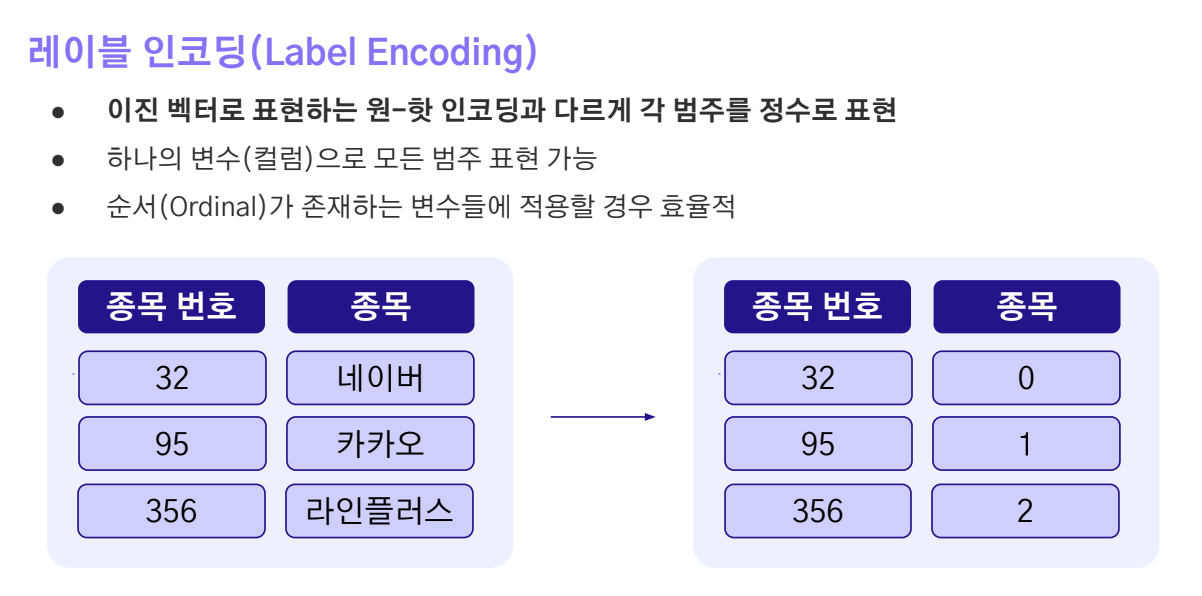

In [165]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'recover_num', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'Íµ¨Î∂Ñnum', 'mean', 'MA_3', 'MA_6', 'EMA_3', 'EMA_6', 'lag_mean_1', 'lag_mean_2', 'lag_mean_3', 'lag_mean_4', 'lag_mean_5']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-ÏàòÏ†ïÏùºÏûê', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate']


In [114]:
### ÏïÑÎûò Î†àÏù¥Î∏îÏù∏ÏΩîÎî© 8Î∂Ñ2Ï¥à Í±∏Î¶º

In [166]:
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [08:24<00:00, 38.81s/it] 


In [167]:
dt_train.drop(['recover_num'], axis = 1, inplace=True)
dt_test.drop(['recover_num'], axis = 1, inplace=True)

In [116]:
dt_train.head(1)        # Î†àÏù¥Î∏îÏù∏ÏΩîÎî©Ïù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

Í≥ÑÏïΩÎÖÑÏõî  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  ÎèÑÎ°úÎ™Ö  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)  k-ÎÇúÎ∞©Î∞©Ïãù     k-Ï†ÑÏ≤¥ÎèôÏàò  \
0  200701  4  1995    0                   0             0       0  15.915509   

       k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº          k-Ïó∞Î©¥Ï†Å       k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  \
0  1326.793403           0              0  228944.608218  125842.750579   

   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-ÏàòÏ†ïÏùºÏûê  \
0          261.770255              582.314815    404.172454       0   

           Í±¥Ï∂ïÎ©¥Ï†Å         Ï£ºÏ∞®ÎåÄÏàò        Ï¢åÌëúX       Ï¢åÌëúY  target  recover_num  Íµ¨  Îèô  \
0  16880.982089  1904.994213  127.04867  37.66456   26000      1096154  0  0   

   Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  Íµ¨Î∂Ñ  Íµ¨Î∂Ñnum  Íµ¨Î∂Ñdate     mean  MA_3  MA_6  EMA_3  EMA_6  \
0    0    0     0     0   0  12200       0  25850.0   NaN   NaN    NaN    NaN   

   lag_mean_1  lag_mean_2  lag_mean_3  lag_mean_4  lag_mean_5  
0     25850.0     25850.0     25850.0     25850.0     25850.0

In [117]:
### ÎÇ¥Ïö©Î≥¥Í∏∞
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 0 to 2079
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Í≥ÑÏïΩÎÖÑÏõî                    2080 non-null   int64  
 1   Ï∏µ                       2080 non-null   int64  
 2   Í±¥Ï∂ïÎÖÑÎèÑ                    2080 non-null   int64  
 3   ÎèÑÎ°úÎ™Ö                     2080 non-null   int64  
 4   k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      2080 non-null   int64  
 5   k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)            2080 non-null   int64  
 6   k-ÎÇúÎ∞©Î∞©Ïãù                  2080 non-null   int64  
 7   k-Ï†ÑÏ≤¥ÎèôÏàò                  2080 non-null   float64
 8   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 2080 non-null   float64
 9   k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              2080 non-null   int64  
 10  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº           2080 non-null   int64  
 11  k-Ïó∞Î©¥Ï†Å                   2080 non-null   float64
 12  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å 

### 5.2. Model Training
- ÏúÑ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ train Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Î™®Îç∏ÏùÄ RandomForestÎ•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
- TrainÍ≥º Valid datasetÏùÑ Î∂ÑÌï†ÌïòÎäî Í≥ºÏ†ïÏóêÏÑúÎäî `holdout` Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥ Î∞©Î≤ïÏùò Í≤ΩÏö∞  ÎåÄÎûµÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Îπ†Î•¥Í≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóêÏÑú baselineÏóêÏÑú ÏÇ¨Ïö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïù¥ ÌõÑ Ï∂îÍ∞ÄÏ†ÅÏù∏ edaÎ•º ÌÜµÌï¥ÏÑú ÌèâÍ∞ÄÏÑ∏Ìä∏ÏôÄ Í≤ΩÌñ•ÏùÑ ÎßûÏ∂îÍ±∞ÎÇò kfoldÏôÄ Í∞ôÏùÄ Î∂ÑÌè¨Ïóê ÎåÄÌïú Í≥†Î†§Î•º Ï∂îÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [168]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

In [169]:
# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [170]:
X_train.fillna(method='bfill', inplace=True)
X_train.fillna(method='ffill', inplace=True)
X_val.fillna(method='bfill', inplace=True)
X_val.fillna(method='ffill', inplace=True)

In [172]:
%%time
# RandomForestRegressorÎ•º Ïù¥Ïö©Ìï¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
### Ï†ÑÏ≤¥ 4Î∂ÑÍ±∏Î¶º
model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

CPU times: user 7min 51s, sys: 2.81 s, total: 7min 53s
Wall time: 5min 28s


- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäî Í≤ÉÎèÑ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.

In [173]:
# ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.

### ÏÉòÌîå 2000Í∞ú RMSE test: 1975.0342233754516

# Ï†ÑÏ≤¥Ïóê ÎåÄÌï¥ RMSE test: 2262.0626330912496

print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 2263.828826627121


- Î≥ÄÏàò Ï§ëÏöîÎèÑÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

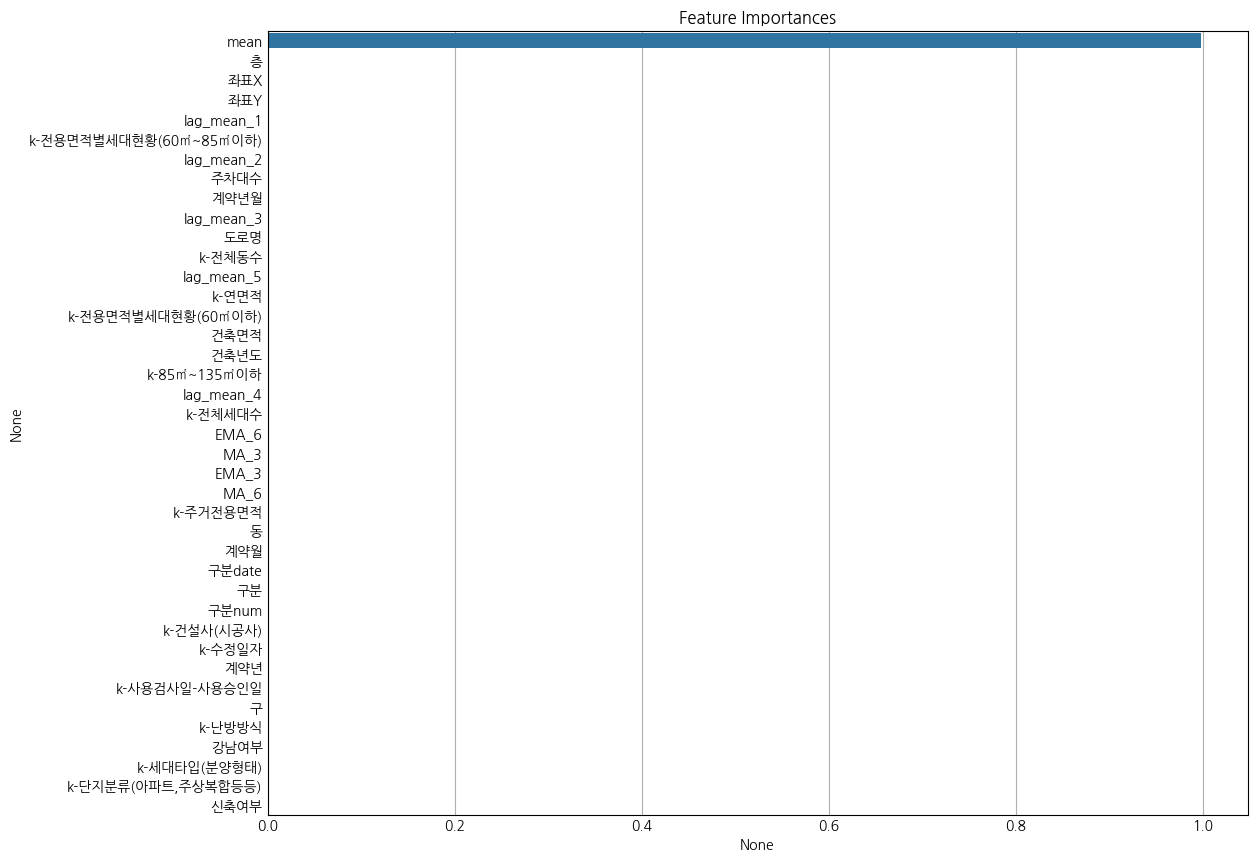

In [174]:
# ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [175]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 5.3. Feature selection

- Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ïú†Ïö©Ìïú Î≥ÄÏàòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ permutation selectionÏùÑ Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [176]:
%%time
# Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.   2Î∂ÑÍ±∏Î¶º
perm = PermutationImportance(model,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
                             scoring = 'neg_mean_squared_error',        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

CPU times: user 3min 27s, sys: 1.07 s, total: 3min 28s
Wall time: 2min 27s


- Î∂ÑÏÑù Í≤∞Í≥º "Í≥ÑÏïΩÎÖÑ", "Ï†ÑÏö©Î©¥Ï†Å" Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌïú Î≥ÄÏàòÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎ°ú Îòê Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎ•º Îçî ÏÉùÏÑ±Ìï¥Î≥¥Í±∞ÎÇò, Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥ Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎ•º ÎßâÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

### 5.4. Valid prediction Î∂ÑÏÑù

- ÏòàÏ∏°Í∞íÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ valid predictionÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [177]:
# Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
X_val['target'] = y_val
X_val['pred'] = pred

In [178]:
# Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE Í≥ÑÏÇ∞
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [179]:
# ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [180]:
X_val_sort.head()

Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)  k-ÎÇúÎ∞©Î∞©Ïãù  \
53775  201612   3  1992  4441                   0             0       0   
25599  202206  13  2006  4420                   3             2       4   
6625   201705   3  1982  4425                   3             2       1   
6954   202007   3  1983   433                   3             2       4   
75410  200701   8  1980  5293                   0             0       0   

           k-Ï†ÑÏ≤¥ÎèôÏàò      k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº          k-Ïó∞Î©¥Ï†Å  \
53775    8.988588   549.710414          72            654   71261.817404   
25599   34.000000  3002.000000         318            331  553661.000000   
6625   124.000000  5040.000000         132              7  240629.000000   
6954     9.000000  1060.000000         321             11   94817.000000   
75410    3.386568   187.050767          72            654   26873.015336   

            k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  \
53775   38031.626248           324.43224              150.185449   
25599  298679.000000           601.00000              936.000000   
6625   242461.000000          4975.00000               65.000000   
6954    73333.000000           220.00000              840.000000   
75410   16664.917504             0.00000              153.038075   

       k-85„é°~135„é°Ïù¥Ìïò  k-ÏàòÏ†ïÏùºÏûê          Í±¥Ï∂ïÎ©¥Ï†Å         Ï£ºÏ∞®ÎåÄÏàò         Ï¢åÌëúX        Ï¢åÌëúY  \
53775     75.092725     718   8110.813124   579.971469  127.165758  37.555014   
25599   1402.000000       7  20457.820000  4443.000000  127.048985  37.493029   
6625       0.000000       2      0.000000     2.000000  127.058521  37.480002   
6954       0.000000     197      0.000000  1100.000000  127.072682  37.489122   
75410     34.012692     718   2041.804870   230.450026  127.136058  37.546643   

       Íµ¨    Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä    Íµ¨Î∂Ñ  Íµ¨Î∂Ñdate  Íµ¨Î∂Ñnum           mean  \
53775  0  281    9   11     1     0  1800   32469   1891  171408.789474   
25599  0   62   15    5     1     0   641   13882    688  235000.000000   
6625   0    8   10    4     1     0   101    2969    107  212500.000000   
6954   0    8   13    6     1     0   108    3196    114  120250.000000   
75410  1   83    0    0     1     0  2556   46071   2659   47581.500000   

                MA_3           MA_6          EMA_3          EMA_6  lag_mean_1  \
53775  126136.263158  129734.798246  141109.342654  128917.932165    120000.0   
25599  287000.000000  290833.333333  271416.778393  282225.761748    313000.0   
6625   171166.666667  154250.000000  179651.772428  159199.020866    153000.0   
6954   142250.000000  149208.333333  136274.430863  141463.720671    148000.0   
75410   19833.333333   19783.333333   20202.676670   19763.316850     47581.5   

       lag_mean_2  lag_mean_3  lag_mean_4  lag_mean_5  target      pred  \
53775     87000.0     85000.0    160000.0    155000.0  250000  140200.0   
25599    313000.0    288000.0    303500.0    292500.0  160000  268500.0   
6625     148000.0    138000.0    136000.0    138000.0  260000  176000.0   
6954     158500.0    157000.0    161500.0    150000.0  163000   85000.0   
75410     47581.5     47581.5     47581.5     47581.5   84750   10413.0   

              error  
53775  1.205604e+10  
25599  1.177225e+10  
6625   7.056000e+09  
6954   6.084000e+09  
75410  5.525990e+09

- ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [181]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [182]:
# Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [183]:
display(error_top100.head(1))
display(best_top100.head(1))

Í≥ÑÏïΩÎÖÑÏõî  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ          ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-ÎÇúÎ∞©Î∞©Ïãù  \
53775  201612  3  1992  ÏÑ†Î¶âÎ°ú190Í∏∏ 120               NULL         NULL   NULL   

         k-Ï†ÑÏ≤¥ÎèôÏàò     k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº         k-Ïó∞Î©¥Ï†Å  \
53775  8.988588  549.710414       NULL          NULL  71261.817404   

           k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  \
53775  38031.626248           324.43224              150.185449     75.092725   

      k-ÏàòÏ†ïÏùºÏûê         Í±¥Ï∂ïÎ©¥Ï†Å        Ï£ºÏ∞®ÎåÄÏàò         Ï¢åÌëúX        Ï¢åÌëúY    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ  \
53775   NULL  8110.813124  579.971469  127.165758  37.555014  Í∞ïÎÇ®Íµ¨  Ï≤≠Îã¥Îèô  2016   

      Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä                                   Íµ¨Î∂Ñ  \
53775  12     1     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ï≤≠Îã¥Îèô 106-11 Ïî®Ìã∞1Ï∞®102Îèô 84.33   

                                           Íµ¨Î∂Ñdate  Íµ¨Î∂Ñnum           mean  \
53775  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ï≤≠Îã¥Îèô 106-11 Ïî®Ìã∞1Ï∞®102Îèô 84.33 201612   1891  171408.789474   

                MA_3           MA_6          EMA_3          EMA_6  lag_mean_1  \
53775  126136.263158  129734.798246  141109.342654  128917.932165    120000.0   

       lag_mean_2  lag_mean_3  lag_mean_4  lag_mean_5  target      pred  \
53775     87000.0     85000.0    160000.0    155000.0  250000  140200.0   

              error  
53775  1.205604e+10

Í≥ÑÏïΩÎÖÑÏõî  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ        ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-ÎÇúÎ∞©Î∞©Ïãù  \
575351  201404  6  1986  ÏõîÎìúÏªµÎ∂ÅÎ°ú 235                ÏïÑÌååÌä∏           Î∂ÑÏñë   Ï§ëÏïôÎÇúÎ∞©   

        k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò    k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº     k-Ïó∞Î©¥Ï†Å  \
575351    33.0   3710.0  Ïú†Ïõê, ÏÑ†Í≤Ω, ÎåÄÏö∞Í±¥ÏÑ§  1986-06-07 00:00:00.0  280399.0   

        k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  \
575351  198027.0              3710.0                     0.0           0.0   

                       k-ÏàòÏ†ïÏùºÏûê  Í±¥Ï∂ïÎ©¥Ï†Å    Ï£ºÏ∞®ÎåÄÏàò        Ï¢åÌëúX        Ï¢åÌëúY    Íµ¨    Îèô  \
575351  2023-09-26 11:05:08.0   0.0  1217.0  126.90282  37.568465  ÎßàÌè¨Íµ¨  ÏÑ±ÏÇ∞Îèô   

         Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä                            Íµ¨Î∂Ñ  \
575351  2014  04     0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÑ±ÏÇ∞Îèô 446 ÏÑ±ÏÇ∞ÏãúÏòÅ 50.03   

                                     Íµ¨Î∂Ñdate  Íµ¨Î∂Ñnum     mean     MA_3  \
575351  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÑ±ÏÇ∞Îèô 446 ÏÑ±ÏÇ∞ÏãúÏòÅ 50.03 201404  15934  32500.0  31937.5   

                MA_6         EMA_3         EMA_6  lag_mean_1  lag_mean_2  \
575351  30960.178571  31929.757767  31294.353522     31900.0     31412.5   

        lag_mean_3    lag_mean_4  lag_mean_5  target     pred  error  
575351     30630.0  30068.571429     29250.0   32000  32000.0    0.0

- Ïù¥Ï†ú Î∂ÑÌè¨Î•º ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

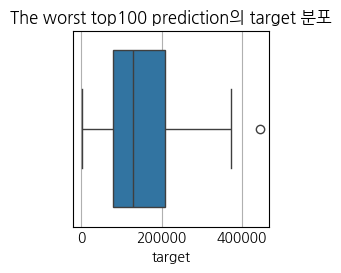

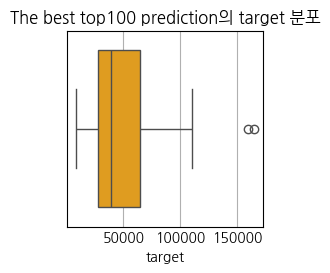

In [184]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

- Taget Î∂ÑÌè¨Î•º Î≥¥Îãà Ï¢ãÏùÄ ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100Í∞úÏùò dataÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100 datasetÎì§Ïù¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏùÑ Î≥¥ÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Î™®Îç∏ÎßÅ Î∞è Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÖÎãàÎã§.

In [185]:
#sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
#sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
#plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
#plt.show()

- Ï†ÑÏö©Î©¥Ï†Å ÎòêÌïú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ ÏßëÎì§Ïù¥ Îçî ÎÑìÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6 . Inference (Ï∂îÎ°†)

In [186]:
dt_test.head(2)      # test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)  k-ÎÇúÎ∞©Î∞©Ïãù  \
11284  202307   5  1987  5519                   3             2       1   
9891   202308  10  2021   430                   3             2       4   

       k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  \
11284     8.0    270.0         237             27  22637.0   20204.0   
9891      2.0    232.0         284            641  44951.0   24878.0   

       k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-ÏàòÏ†ïÏùºÏûê  \
11284                20.0                   250.0           0.0     201   
9891                  0.0                     0.0         232.0     203   

          Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò         Ï¢åÌëúX        Ï¢åÌëúY  target  Íµ¨  Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  \
11284  4858.00  262.0  127.057210  37.476763       0  0  8   16    6     1   
9891   2724.46  305.0  127.056394  37.484892       0  0  8   16    7     1   

       Ïã†Ï∂ïÏó¨Î∂Ä     Íµ¨Î∂Ñ  Íµ¨Î∂Ñdate  Íµ¨Î∂Ñnum  mean           MA_3      MA_6  \
11284     0    148  589374    160   0.0  145333.333333  178500.0   
9891      1  30252  589368    139   0.0            NaN       NaN   

               EMA_3         EMA_6  lag_mean_1  lag_mean_2  lag_mean_3  \
11284  107732.998162  148153.68578    216000.0    220000.0    215000.0   
9891             NaN           NaN         NaN         NaN         NaN   

       lag_mean_4  lag_mean_5  
11284    220000.0    200000.0  
9891          NaN         NaN

In [188]:
dt_test

Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)  k-ÎÇúÎ∞©Î∞©Ïãù  \
11284    202307   5  1987  5519                   3             2       1   
9891     202308  10  2021   430                   3             2       4   
10079    202307  15  1984   428                   3             2       4   
10078    202308  14  1984   428                   3             2       4   
10077    202308   6  1984   428                   3             2       4   
...         ...  ..   ...   ...                 ...           ...     ...   
1014778  202307  13  2014  4965                   3             1       1   
1014558  202307  12  2014  4965                   3             1       1   
1014427  202308  12  2014  4965                   3             1       1   
1015064  202309  18  2014  4965                   3             1       1   
1014779  202309  13  2014  4965                   3             1       1   

         k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº     k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  \
11284       8.0    270.0         237             27   22637.0   20204.0   
9891        2.0    232.0         284            641   44951.0   24878.0   
10079       5.0    405.0         237             16   63304.0   53437.0   
10078       5.0    405.0         237             16   63304.0   53437.0   
10077       5.0    405.0         237             16   63304.0   53437.0   
...         ...      ...         ...            ...       ...       ...   
1014778    16.0   1402.0         302            514  190866.0   93849.0   
1014558    16.0   1402.0         302            514  190866.0   93849.0   
1014427    16.0   1402.0         302            514  190866.0   93849.0   
1015064    16.0   1402.0         302            514  190866.0   93849.0   
1014779    16.0   1402.0         302            514  190866.0   93849.0   

         k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-ÏàòÏ†ïÏùºÏûê  \
11284                  20.0                   250.0           0.0     201   
9891                    0.0                     0.0         232.0     203   
10079                   0.0                     0.0         285.0     198   
10078                   0.0                     0.0         285.0     198   
10077                   0.0                     0.0         285.0     198   
...                     ...                     ...           ...     ...   
1014778               808.0                   504.0          90.0     123   
1014558               808.0                   504.0          90.0     123   
1014427               808.0                   504.0          90.0     123   
1015064               808.0                   504.0          90.0     123   
1014779               808.0                   504.0          90.0     123   

             Í±¥Ï∂ïÎ©¥Ï†Å    Ï£ºÏ∞®ÎåÄÏàò         Ï¢åÌëúX        Ï¢åÌëúY  target   Íµ¨    Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  \
11284     4858.00   262.0  127.057210  37.476763       0   0    8   16    6   
9891      2724.46   305.0  127.056394  37.484892       0   0    8   16    7   
10079    61064.24   419.0  127.055990  37.483894       0   0    8   16    6   
10078    61064.24   419.0  127.055990  37.483894       0   0    8   16    7   
10077    61064.24   419.0  127.055990  37.483894       0   0    8   16    7   
...           ...     ...         ...        ...     ...  ..  ...  ...  ...   
1014778  14171.00  1568.0  127.106720  37.618870       0  24  172   16    6   
1014558  14171.00  1568.0  127.106720  37.618870       0  24  172   16    6   
1014427  14171.00  1568.0  127.106720  37.618870       0  24  172   16    7   
1015064  14171.00  1568.0  127.106720  37.618870       0  24  172   16    8   
1014779  14171.00  1568.0  127.106720  37.618870       0  24  172   16    8   

         Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä     Íµ¨Î∂Ñ  Íµ¨Î∂Ñdate  Íµ¨

In [189]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [190]:
X_test = dt_test.drop(['target'], axis=1)

In [191]:
X_test.isna().sum()

Í≥ÑÏïΩÎÖÑÏõî                         0
Ï∏µ                            0
Í±¥Ï∂ïÎÖÑÎèÑ                         0
ÎèÑÎ°úÎ™Ö                          0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)           0
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)                 0
k-ÎÇúÎ∞©Î∞©Ïãù                       0
k-Ï†ÑÏ≤¥ÎèôÏàò                       0
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                      0
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                   0
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº                0
k-Ïó∞Î©¥Ï†Å                        0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                     0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)           0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)       0
k-85„é°~135„é°Ïù¥Ìïò                 0
k-ÏàòÏ†ïÏùºÏûê                       0
Í±¥Ï∂ïÎ©¥Ï†Å                         0
Ï£ºÏ∞®ÎåÄÏàò                         0
Ï¢åÌëúX                          0
Ï¢åÌëúY                          0
Íµ¨                            0
Îèô                            0
Í≥ÑÏïΩÎÖÑ                          0
Í≥ÑÏïΩÏõî     

In [192]:
X_test.fillna(method='bfill', inplace=True)
X_test.fillna(method='ffill', inplace=True)

In [193]:
%%time

# Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
real_test_pred = model.predict(X_test)

CPU times: user 14.4 ms, sys: 980 ¬µs, total: 15.4 ms
Wall time: 20.4 ms


In [194]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

array([1426.2, 1358.2, 1418.4, ..., 1360. , 1360. , 1124. ])

## 7 . Output File Save

In [195]:
# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)

In [197]:
preds_df.to_csv('/content/drive/MyDrive/AILAB_Advance/output.csv', index=False)


# Í∏∞ÌÉÄ : ÌïúÍ∏Ä Îã§Ïãú ÏÑ§Ïπò

In [196]:
### ÌïúÍ∏Ä Îã§Ïãú ÏÑ§Ïπò
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# Ï∂úÏ≤ò: https://giveme-happyending.tistory.com/192 [ÏÜåÏó∞Ïùò_Í∞úÎ∞úÏùºÏßÄ:Ìã∞Ïä§ÌÜ†Î¶¨]

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director